<a href="https://colab.research.google.com/github/OlgaTora/Diplom-Case8/blob/main/Case_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and description of dataset



In [ ]:
from plotly import express
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
import math
from sklearn import preprocessing
from sklearn.feature_selection import RFECV
#from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, classification_report

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [ ]:
product = pd.read_excel('/content/drive/MyDrive/Case_8/product.xlsx')
manuf = pd.read_excel('/content/drive/MyDrive/Case_8/manufacturer.xlsx')
sent = pd.read_excel('/content/drive/MyDrive/Case_8/sentiment.xlsx')


In [ ]:
sales = pd.read_excel('/content/drive/MyDrive/Case_8/sales_case8.xlsx')

In [ ]:
geo = pd.read_excel('/content/drive/MyDrive/Case_8/geo.xlsx')

In [ ]:
date = pd.read_excel('/content/drive/MyDrive/Case_8/date.xlsx')

# EDA & Feature engeeniring

Посмотрим таблицу с данными о товарах

In [ ]:
product.head()

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
0,VanArsdel,Urban,Convenience,Maximus UC-01,536,Yes,N,7,No
1,VanArsdel,Urban,Convenience,Maximus UC-02,537,Yes,N,7,No
2,VanArsdel,Urban,Convenience,Maximus UC-03,538,Yes,N,7,No
3,VanArsdel,Urban,Convenience,Maximus UC-04,539,Yes,N,7,No
4,VanArsdel,Urban,Convenience,Maximus UC-05,540,Yes,N,7,No


In [ ]:
product.shape

(2412, 9)

In [ ]:
product.isna().sum()

Manufacturer      0
Category          0
Segment           0
Product           0
ProductID         0
isVanArsdel       0
IsCompeteHide     0
ManufacturerID    0
IsCompete         0
dtype: int64

In [ ]:
product.nunique()

Manufacturer        14
Category             4
Segment              8
Product           2172
ProductID         2412
isVanArsdel          2
IsCompeteHide        2
ManufacturerID      14
IsCompete            2
dtype: int64

Проверим гипотезу, что столбцы IsCompeteHide и IsCompete содержат одно и тоже

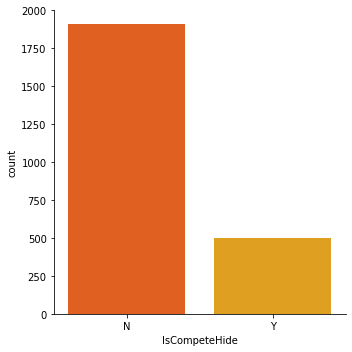

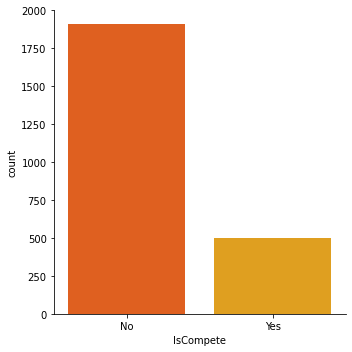

In [ ]:
sns.catplot(x ='IsCompeteHide', kind = 'count', data = product, palette='autumn')
sns.catplot(x = 'IsCompete', kind = 'count', data = product, palette='autumn')


In [ ]:
# Удалим
product = product.drop(columns= ['IsCompeteHide'])

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    2412 non-null   object
 1   Category        2412 non-null   object
 2   Segment         2412 non-null   object
 3   Product         2412 non-null   object
 4   ProductID       2412 non-null   int64 
 5   isVanArsdel     2412 non-null   object
 6   ManufacturerID  2412 non-null   int64 
 7   IsCompete       2412 non-null   object
dtypes: int64(2), object(6)
memory usage: 150.9+ KB


Надо разобраться, что значит столбец IsCompete. Предположим, это товар, по которому у компании есть конкуренты

In [ ]:
product['IsCompete'].value_counts()

No     1910
Yes     502
Name: IsCompete, dtype: int64

In [ ]:
product['isVanArsdel'].value_counts()

No     2110
Yes     302
Name: isVanArsdel, dtype: int64

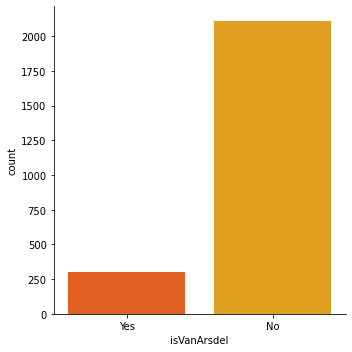

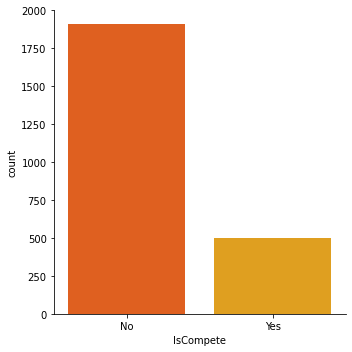

In [ ]:
sns.catplot(x ='isVanArsdel', kind = 'count', data = product, palette='autumn')
sns.catplot(x ='IsCompete', kind = 'count', data = product, palette='autumn')

In [ ]:
product['Manufacturer'].value_counts()

Quibus       455
Natura       333
VanArsdel    302
Aliqui       226
Abbas        198
Currus       194
Pirum        190
Fama         181
Pomum        137
Victoria      85
Leo           45
Salvus        38
Palma         16
Barba         12
Name: Manufacturer, dtype: int64

In [ ]:
product.loc[product['IsCompete'] == 'Yes']

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,ManufacturerID,IsCompete
752,VanArsdel,Urban,Moderation,Maximus UM-01,396,Yes,7,Yes
753,VanArsdel,Urban,Moderation,Maximus UM-02,397,Yes,7,Yes
754,VanArsdel,Urban,Moderation,Maximus UM-03,398,Yes,7,Yes
755,VanArsdel,Urban,Moderation,Maximus UM-04,399,Yes,7,Yes
756,VanArsdel,Urban,Moderation,Maximus UM-05,400,Yes,7,Yes
...,...,...,...,...,...,...,...,...
1517,Abbas,Youth,Youth,Abbas YY-01,197,No,1,Yes
1518,Abbas,Youth,Youth,Abbas YY-02,198,No,1,Yes
1560,Salvus,Youth,Youth,Salvus YY-15,1704,No,13,Yes
1641,Currus,Youth,Youth,Currus YY-03,2099,No,4,Yes


Не до конца ясно назначение IsCompete. Так как метка стоит и у собственного товара, и у конкурентов.

Посмотрим таблицу с данными о производителях

In [ ]:
manuf.shape

(14, 3)

In [ ]:
manuf.head()

,ManufacturerID,Manufacturer,MfgisVanArsdel
0,6,Leo,No
1,12,Quibus,No
2,1,Abbas,No
3,2,Aliqui,No
4,14,Victoria,No


Очевидно, что эти данные есть в таблице с товаром. Столбец MfgisVanArsdel дублируется  isVanArsdel. Поэтому данную таблицу не джойним.

Рассмотрим таблицу с непереводимым на бизнес английский Sentiment

In [ ]:
sent.head()

,DateID,StateID,ManufacturerID,Score,Manufacturer,Date,State,zip,ProductID
0,7,12,7,46,Maximus,2013-07-01,IA,50001,392
1,7,2,7,44,Maximus,2013-07-01,AL,35004,392
2,7,27,7,47,Maximus,2013-07-01,ND,58001,392
3,7,23,7,41,Maximus,2013-07-01,MO,63005,392
4,7,5,7,41,Maximus,2013-07-01,CA,12,392


In [ ]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateID          1564 non-null   int64         
 1   StateID         1564 non-null   int64         
 2   ManufacturerID  1564 non-null   int64         
 3   Score           1564 non-null   int64         
 4   Manufacturer    1564 non-null   object        
 5   Date            1564 non-null   datetime64[ns]
 6   State           1564 non-null   object        
 7   zip             1564 non-null   int64         
 8   ProductID       1564 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 110.1+ KB


In [ ]:
sent.nunique()

DateID            18
StateID           49
ManufacturerID     1
Score             51
Manufacturer       1
Date              18
State             49
zip               49
ProductID          1
dtype: int64

Речь идет про один товар одного производителя, видимо для какого-то выборочного анализа. Пока эта таблица не понадобится

Изучим главную таблицу - Продажи

In [ ]:
sales.head()

,ProductID,Date,Zip,Units,Revenue
0,981,2014-12-30,6111,12,"$31 676,40"
1,1086,2014-12-30,92879,7,"$11 020,59"
2,1085,2014-12-30,92879,7,"$11 020,59"
3,489,2014-12-30,32901,3,"$35 010,36"
4,1989,2014-12-30,84770,3,"$16 441,11"


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   ProductID  1048575 non-null  int64         
 1   Date       1048575 non-null  datetime64[ns]
 2   Zip        1048575 non-null  int64         
 3   Units      1048575 non-null  int64         
 4   Revenue    1048534 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 40.0+ MB


Есть проблема с форматом данных по сумме продаж



In [ ]:
sales = sales.replace(to_replace = '[$]', value = '', regex=True)
sales = sales.replace(to_replace = '[,]', value = '.', regex=True)

In [ ]:
sales.Revenue = sales.Revenue.str.replace(u'\xa0', '')

In [ ]:
sales= sales.astype({'Revenue':float})

In [ ]:
sales.head(2)

,ProductID,Date,Zip,Units,Revenue
0,981,2014-12-30,6111,12,31676.40
1,1086,2014-12-30,92879,7,11020.59


In [ ]:
sales.shape

(1048575, 5)

In [ ]:
sales.isna().sum()

ProductID     0
Date          0
Zip           0
Units         0
Revenue      41
dtype: int64

Заменим пропущенные значения на среднее, но при такои количестве есть вариант и удалить строки

In [ ]:
sales['Revenue'] = sales['Revenue'].fillna(np.mean(sales['Revenue']))

Можем соединить sales и product, так как есть общий столбец product_id

In [ ]:
df = sales
df = df.merge(product, how='left', on='ProductID')

In [ ]:
df.head()

,ProductID,Date,Zip,Units,Revenue,Manufacturer,Category,Segment,Product,isVanArsdel,ManufacturerID,IsCompete
0,981,2014-12-30,6111,12,31676.40,Natura,Urban,Convenience,Natura UC-44,No,8,No
1,1086,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-32,No,10,No
2,1085,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-31,No,10,No
3,489,2014-12-30,32901,3,35010.36,VanArsdel,Urban,Moderation,Maximus UM-94,Yes,7,Yes
4,1989,2014-12-30,84770,3,16441.11,Currus,Rural,Select,Currus RS-08,No,4,No


Взглянем на таблицу с геоданными

In [ ]:
geo.head(2)

,Zip,City,State,Region,District
0,15201,"Pittsburgh, PA",PA,East,District #13
1,15202,"Pittsburgh, PA",PA,East,District #13


In [ ]:
geo.shape

(39948, 5)

In [ ]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Zip       39948 non-null  int64 
 1   City      39948 non-null  object
 2   State     39948 non-null  object
 3   Region    39948 non-null  object
 4   District  39948 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
geo.isna().sum()

Zip         0
City        0
State       0
Region      0
District    0
dtype: int64

Соединим geo с нашей таблицей

In [ ]:
df = df.merge(geo, how='left', on='Zip')

In [ ]:
df.head(2)

,ProductID,Date,Zip,Units,Revenue,Manufacturer,Category,Segment,Product,isVanArsdel,ManufacturerID,IsCompete,City,State,Region,District
0,981,2014-12-30,6111,12,31676.40,Natura,Urban,Convenience,Natura UC-44,No,8,No,"Newington, CT",CT,East,District #02
1,1086,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-32,No,10,No,"Corona, CA",CA,West,District #38


In [ ]:
df.shape

(1048575, 16)

Посмотрим таблицу с датами

In [ ]:
date.head()

,Date,MonthNo,MonthName,MonthID,Month,Quarter,Year,RunningMonths,Running Year,Running Months,Rolling Period,Rolling Period Sort,MonthIndex
0,1999-07-01,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
1,1999-07-02,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
2,1999-07-03,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
3,1999-07-04,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
4,1999-07-05,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7


In [ ]:
date.shape

(6209, 13)

In [ ]:
date.nunique()

Date                   6209
MonthNo                  12
MonthName                12
MonthID                 204
Month                   204
Quarter                   4
Year                     17
RunningMonths           204
Running Year             16
Running Months            3
Rolling Period           12
Rolling Period Sort      12
MonthIndex              204
dtype: int64

Данная таблица используется для аналитики в компании. В ней есть номер текущего месяца и периода видимо от начала работы компании. Сам период дат от 1.7.99 по 31.1.15, что гораздо шире периода из таблицы продаж. Для анализа временных рядов оставим текущий месяц.

In [ ]:
date = date.drop(columns=['MonthNo', 'MonthName', 'MonthID', 'Quarter', 'Running Months', 'Running Year',
                          'Month', 'Rolling Period', 'Rolling Period Sort', 'MonthIndex', 'Year'])

In [ ]:
df = df.merge(date, how='left', on='Date')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ProductID       1048575 non-null  int64         
 1   Date            1048575 non-null  datetime64[ns]
 2   Zip             1048575 non-null  int64         
 3   Units           1048575 non-null  int64         
 4   Revenue         1048575 non-null  float64       
 5   Manufacturer    1048575 non-null  object        
 6   Category        1048575 non-null  object        
 7   Segment         1048575 non-null  object        
 8   Product         1048575 non-null  object        
 9   isVanArsdel     1048575 non-null  object        
 10  ManufacturerID  1048575 non-null  int64         
 11  IsCompete       1048575 non-null  object        
 12  City            1048575 non-null  object        
 13  State           1048575 non-null  object        
 14  Region          10

In [ ]:
# удалим ненужные
df = df.drop(columns= ['ProductID', 'ManufacturerID'])

In [ ]:
# удалим дубликаты строк
df = df.drop_duplicates()

In [ ]:
# для файла общего для Biq Query придется удалить эти столбцы, тк можно загрузить файл только дл 100 МБ
df_full = df.drop(columns=['IsCompete', 'isVanArsdel', 'RunningMonths', 'District'])

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048536 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Date          1048536 non-null  datetime64[ns]
 1   Zip           1048536 non-null  int64         
 2   Units         1048536 non-null  int64         
 3   Revenue       1048536 non-null  float64       
 4   Manufacturer  1048536 non-null  object        
 5   Category      1048536 non-null  object        
 6   Segment       1048536 non-null  object        
 7   Product       1048536 non-null  object        
 8   City          1048536 non-null  object        
 9   State         1048536 non-null  object        
 10  Region        1048536 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 96.0+ MB


In [ ]:
df_full.nunique()

Date             4480
Zip             31835
Units              35
Revenue          3385
Manufacturer       14
Category            4
Segment             8
Product          1622
City            24328
State              49
Region              3
dtype: int64

In [ ]:
# Сохраним файл со всеми производителями
df_full.to_csv('/content/drive/MyDrive/Case_8/df.csv', index=False)

In [ ]:
df = df.loc[df['isVanArsdel'] == 'Yes']
df.shape


(248458, 15)

In [ ]:
# И столбцы, где одно значение
df = df.drop(columns=['Manufacturer', 'isVanArsdel'])

In [ ]:
df.nunique()

Date              4342
Zip              25350
Units               23
Revenue           1389
Category             2
Segment              6
Product            210
IsCompete            2
City             19167
State               49
Region               3
District            39
RunningMonths      153
dtype: int64

In [ ]:
# проверим нет ли значений 0 или отрицательных
print(len(df[df['Revenue']<=0]))

0


Добавим стоимость единицы товара

In [ ]:
df['Price'] = df['Revenue']/df['Units']

In [ ]:
round(df.describe(),2)

,Zip,Units,Revenue,RunningMonths,Price
count,248458.00,248458.00,248458.00,248458.00,248458.00
mean,51955.13,1.02,10760.40,83.21,10545.53
std,27336.76,0.31,4627.76,42.21,3376.97
min,1001.00,1.00,2516.85,1.00,2516.85
25%,30028.00,1.00,9021.60,50.00,8993.25
50%,49735.00,1.00,10895.85,87.00,10839.15
75%,76556.75,1.00,11969.37,119.00,11969.37
max,99921.00,31.00,333409.23,153.00,24695.37


Видим большой выброс аномалий между 75% и максимумом, но будем работать с полным датасетом

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Код с удалением аномалий
# df = df[~((df<(Q1 - 1.5 * IQR))|(wine>(Q3 + 1.5 * IQR))).any(axis= 1)]

Zip              46528.75
Units                0.00
Revenue           2947.77
RunningMonths       69.00
Price             2976.12
dtype: float64


Рассмотрим сам ассортимент компании

In [ ]:
df['Category'].value_counts()

Urban    248386
Rural        72
Name: Category, dtype: int64

In [ ]:
x = df.groupby('Category').Revenue.sum()

Мы видим, что продажи идут по категории urban - товары для города. Соответственно, можно удалить данный признак.

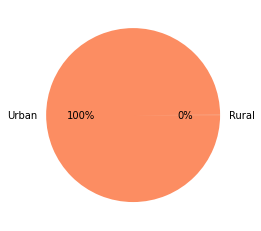

In [ ]:
colors = sns.color_palette('Set2')
plt.pie(x, labels=x.index, colors= colors, autopct='%.0f%%', radius= 1)
plt.show()

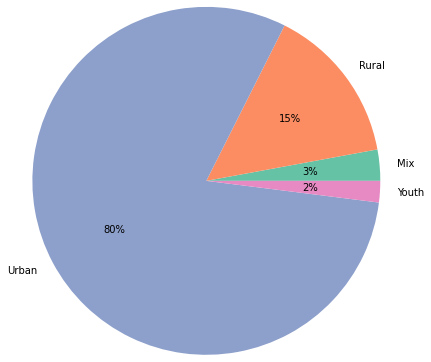

In [ ]:
# Ситуация по рынку
x = df_full.groupby('Category').Revenue.sum()
colors = sns.color_palette('Set2')
plt.pie(x, labels=x.index, colors= colors, autopct='%.0f%%', radius= 2)
plt.show()

In [ ]:
df = df.drop(columns=['Category'])

In [ ]:
df['Segment'].value_counts()

Convenience     127338
Moderation      116779
Extreme           3101
Regular           1168
Select              50
Productivity        22
Name: Segment, dtype: int64

In [ ]:
x = df.groupby('Segment').Revenue.sum()

Лидируют сегменты - Convenience - Moderation.
Они занимают более 90% продаж по компании.

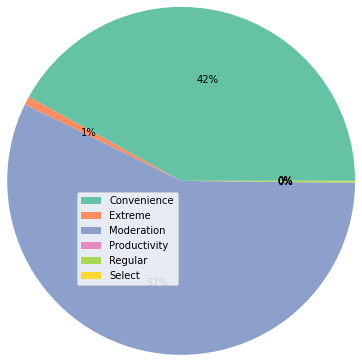

In [ ]:
colors = sns.color_palette('Set2')
plt.pie(x, colors= colors, radius= 2, autopct='%.0f%%')
plt.legend(x.index)
plt.show()

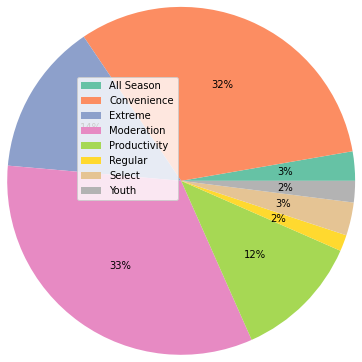

In [ ]:
x = df_full.groupby('Segment').Revenue.sum()
colors = sns.color_palette('Set2')
plt.pie(x, colors= colors, radius= 2, autopct='%.0f%%')
plt.legend(x.index)
plt.show()

In [ ]:
df['District'].value_counts()[:7]

District #23    10972
District #10     8925
District #19     7811
District #30     7510
District #18     7477
District #04     7341
District #39     7269
Name: District, dtype: int64

In [ ]:
x = df.groupby('District').Revenue.sum()

Продажи по районам достаточно ровно распределены.

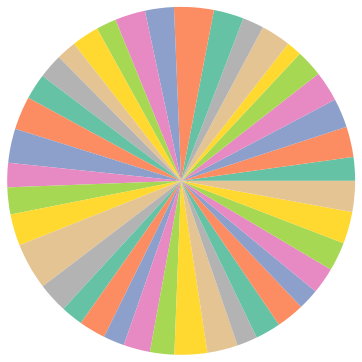

In [ ]:
colors = sns.color_palette('Set2')
plt.pie(x, colors= colors, radius= 2)
plt.show()

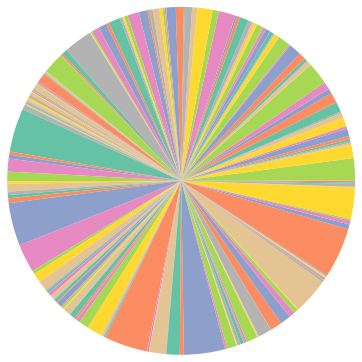

In [ ]:
x = df.groupby('Product').Revenue.sum()
colors = sns.color_palette('Set2')
plt.pie(x, data=df, colors= colors, radius= 2)
plt.show()

Специально выбрала круговую, чтобы было видно, что количество наименований товара много, но есть очевидные флагманы. Нужно сделать abc-xyz анализ.

In [ ]:
df.shape

(248458, 13)

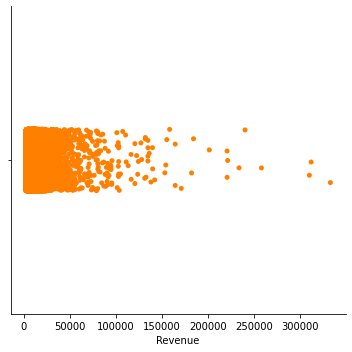

In [ ]:
# Посмотрим графически на целевой признак для регрессии:
sns.catplot(x ='Revenue', data = df, palette='autumn')

Посмотрим зависимость дохода от признаков

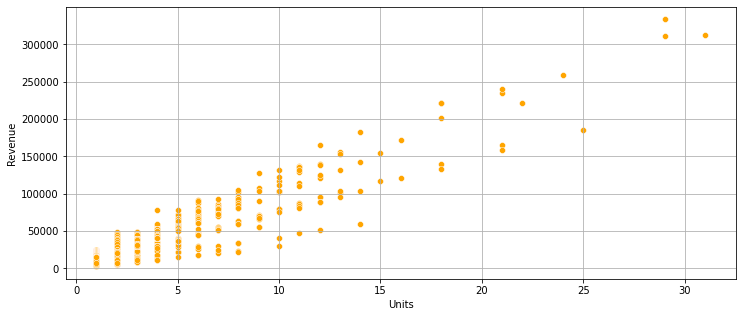

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, y= 'Revenue', x= 'Units', color='orange')
plt.grid()

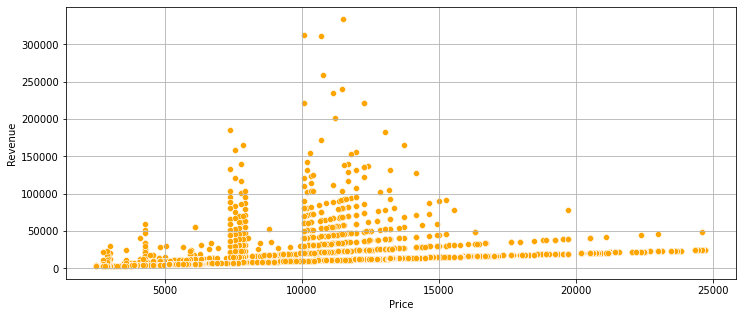

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, y= 'Revenue', x= 'Price', color='orange')
plt.grid()

С количеством проданных единиц мы видим большую зависимость, надо учесть это при построении моделей.

<AxesSubplot:>

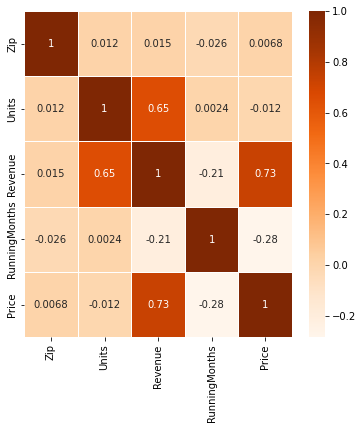

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap = 'Oranges')

Text(0.5, 0, 'State')

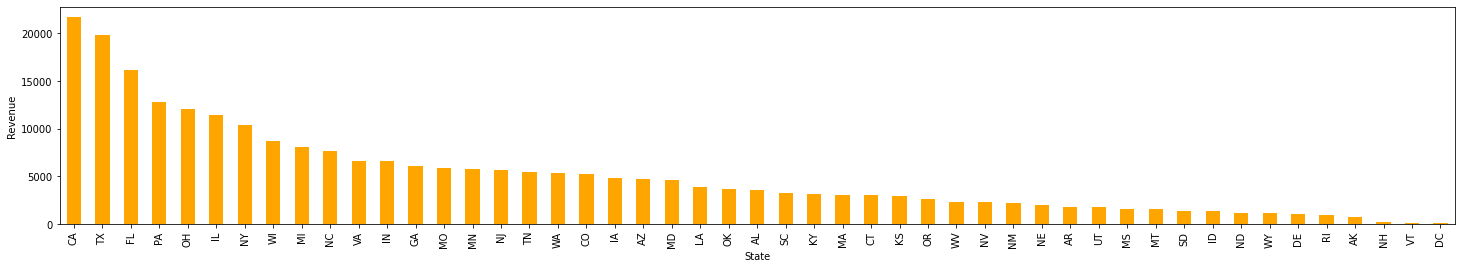

In [ ]:
df.State.value_counts().plot(kind='bar', figsize=(25, 4), color='orange')
plt.ylabel('Revenue')
plt.xlabel('State')

Text(0.5, 0, 'Region')

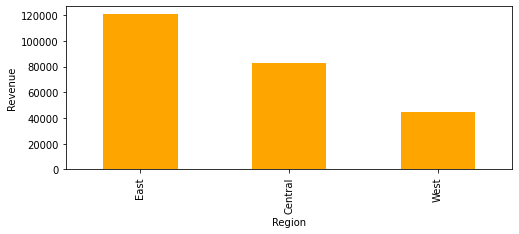

In [ ]:
df.Region.value_counts().plot(kind='bar', figsize=(8,3), color='orange')
plt.ylabel('Revenue')
plt.xlabel('Region')

Text(0.5, 0, 'Region')

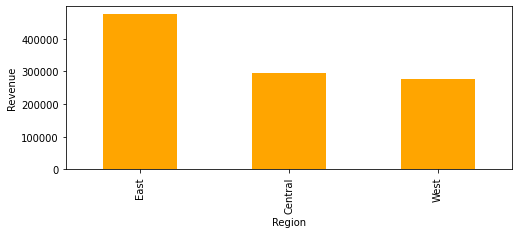

In [ ]:
# общая картина по отрасли
df_full.Region.value_counts().plot(kind='bar', figsize=(8,3), color='orange')
plt.ylabel('Revenue')
plt.xlabel('Region')

По географическим признакам видно, что продажи в разных местах страны отличаются.

Text(0.5, 0, 'District')

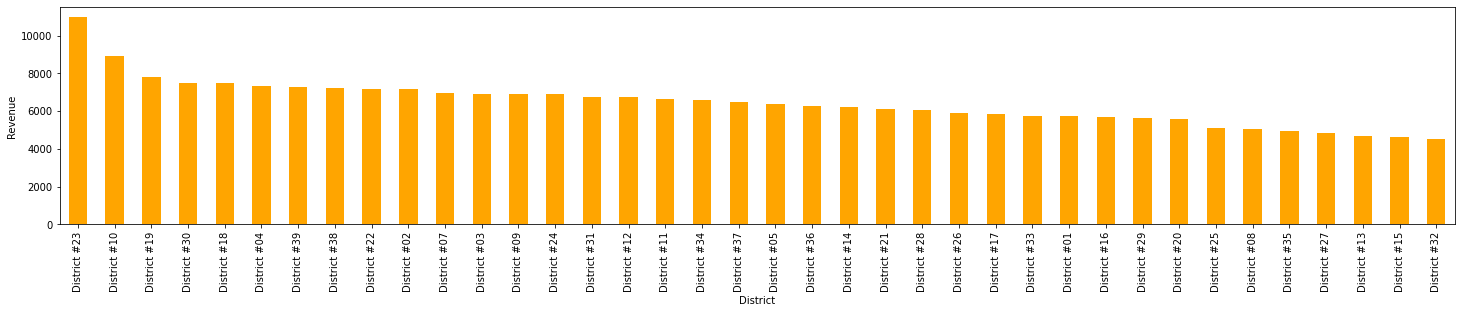

In [ ]:
df.District.value_counts().nlargest(38).plot(kind='bar', figsize=(25,4), color='orange')
plt.ylabel('Revenue')
plt.xlabel('District')

По имеющейся информации данную задачу можно свести:
1. к задачи регрессии и исследовать целевой признак - доход компании (Revenue), Интересно сделать это и через классические модели (не убирая признак "Количество" или "Цена" и через временные ряды)
2. к анализу ABC-XYZ
3. к анализу RFM по городам или по штатам.

Посмотрим количество уникальных значений.

In [ ]:
df.nunique()

Date              4342
Zip              25350
Units               23
Revenue           1389
Segment              6
Product            210
IsCompete            2
City             19167
State               49
Region               3
District            39
RunningMonths      153
Price              776
dtype: int64

Взглянем на распределение по количеству и по цене

In [ ]:
df['Units'].value_counts()

1     245439
2       2295
3        282
4        156
5         76
6         65
8         31
7         30
10        17
11        14
9         13
12        11
13         6
18         5
14         4
21         4
15         2
16         2
29         2
22         1
24         1
25         1
31         1
Name: Units, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Units'>

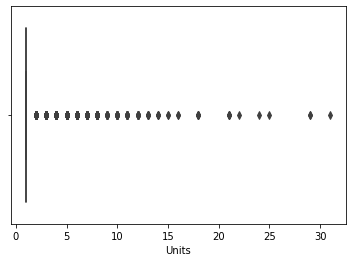

In [ ]:
sns.boxplot(df['Units'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

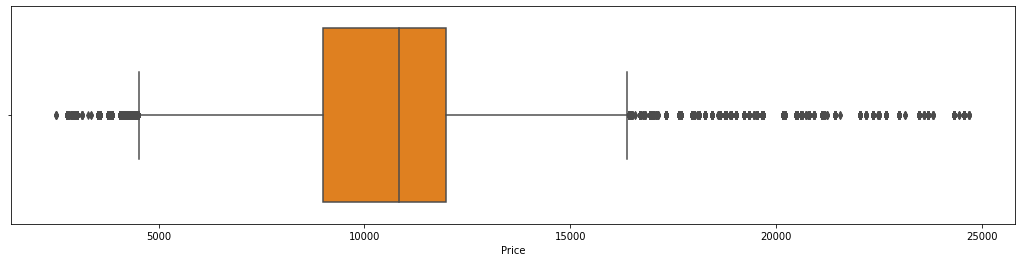

In [ ]:
plt.figure(figsize=(18,4))
sns.boxplot(df['Price'], palette='autumn')

In [ ]:
#Посмотрим, есть ли штат или город с 1-2 продажами, минимум по штату - 62 продажи
df.State.value_counts()[48]

67

In [ ]:
# Городов всего 19167 - 4440 городов с одной продажей
#df.City.value_counts()[22078:22080]
df.City.value_counts()[14725:14727]

Creola, AL     2
Raywood, TX    1
Name: City, dtype: int64

Можно попробовать сделать rfm анализ для городов, как для покупателей

In [ ]:
df.District.value_counts()[38]

3695

In [ ]:
# проверка перед сохранением
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248458 entries, 3 to 1048461
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           248458 non-null  datetime64[ns]
 1   Zip            248458 non-null  int64         
 2   Units          248458 non-null  int64         
 3   Revenue        248458 non-null  float64       
 4   Segment        248458 non-null  object        
 5   Product        248458 non-null  object        
 6   IsCompete      248458 non-null  object        
 7   City           248458 non-null  object        
 8   State          248458 non-null  object        
 9   Region         248458 non-null  object        
 10  District       248458 non-null  object        
 11  RunningMonths  248458 non-null  int64         
 12  Price          248458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 26.5+ MB


In [ ]:
# сохраним файл для работы с временными рядами
df_time = df
df.to_csv('/content/drive/MyDrive/Case_8/df_lastyear.csv', index=False)

In [ ]:
# Сделаем копию для автоматических библиотек
df, df_val = train_test_split(df, test_size=0.05,random_state=0)

df_train, df_test = train_test_split(df, test_size=.25, random_state=0)

df_train.to_csv('/content/drive/MyDrive/Case_8/df_train.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/Case_8/df_test.csv', index=False)
df_val.to_csv('/content/drive/MyDrive/Case_8/df_val.csv', index=False)

In [ ]:
#df['Month'] = df.Date.dt.month
#df['Year'] = df.Date.dt.year

In [ ]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248458 entries, 3 to 1048461
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           248458 non-null  datetime64[ns]
 1   Zip            248458 non-null  int64         
 2   Units          248458 non-null  int64         
 3   Revenue        248458 non-null  float64       
 4   Segment        248458 non-null  object        
 5   Product        248458 non-null  object        
 6   IsCompete      248458 non-null  object        
 7   City           248458 non-null  object        
 8   State          248458 non-null  object        
 9   Region         248458 non-null  object        
 10  District       248458 non-null  object        
 11  RunningMonths  248458 non-null  int64         
 12  Price          248458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 26.5+ MB


# Functions

In [ ]:
# Фунция для расчета и вывода показателей моделей

def count_metrics(name_of_model):
  name_of_model.fit(X_train, y_train)
  y_pred = name_of_model.predict(X_test)
  crossr = cross_val_score(estimator = name_of_model, X = X_train, y = y_train, cv = 10, verbose = 0)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred)**0.5
  rae = np.mean(abs(y_pred - y_test))/np.mean(abs(y_test-np.mean(y_test)))
  rse = np.mean((y_pred - y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
  r2 = r2_score(y_test, y_pred)
  print(f"Results of {name_of_model}")
  print(f"The R2 value of {name_of_model} is {round(r2, 4)}")
  print(f"MAE Error is {round(mae, 6)}")
  print(f"RMSE is {round(rmse, 6)}")
  print(f"RAE is {round(rae, 6)}")
  print(f"RSE is {round(rse, 6)}")
  print(f"Cross validation train is {crossr}")
  print("____________________________")


# Метрики
def metrics(name_of_model):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred)**0.5
  rae = np.mean(abs(y_pred - y_test))/np.mean(abs(y_test-np.mean(y_test)))
  rse = np.mean((y_pred - y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
  r2 = r2_score(y_test, y_pred)
  print(f"Results of {name_of_model}")
  print(f"The R2 value of {name_of_model} is {round(r2, 4)}")
  print(f"MAE is {round(mae, 6)}")
  print(f"RMSE is {round(rmse, 6)}")
  print(f"RAE is {round(rae, 6)}")
  print(f"RSE is {round(rse, 6)}")
  print("____________________________")

In [ ]:
def encoder_cat(name_of_X):
    cat_feat = name_of_X.select_dtypes(include='object')
    cat_feat.describe()
    for columns in cat_feat:
      encoder = preprocessing.LabelEncoder()
      encoder = encoder.fit(name_of_X[columns])
      name_of_X[columns] = encoder.transform(name_of_X[columns])


# Regression

В качестве целевого признака будет доход, он же Revenue

In [ ]:
#df['Month'] = df.Date.dt.month
#df['Year'] = df.Date.dt.year

In [ ]:
df = df.drop(columns=['RunningMonths', 'Zip', 'IsCompete'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236035 entries, 534909 to 799377
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      236035 non-null  datetime64[ns]
 1   Units     236035 non-null  int64         
 2   Revenue   236035 non-null  float64       
 3   Segment   236035 non-null  object        
 4   Product   236035 non-null  object        
 5   City      236035 non-null  object        
 6   State     236035 non-null  object        
 7   Region    236035 non-null  object        
 8   District  236035 non-null  object        
 9   Price     236035 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 19.8+ MB


In [ ]:
df.head()

,Date,Units,Revenue,Segment,Product,City,State,Region,District,Price
534909,2006-12-02,1,11267.55,Moderation,Maximus UM-15,"Fleming Island, FL",FL,East,District #12,11267.55
734746,2005-03-07,1,12344.85,Moderation,Maximus UM-80,"Madison, WV",WV,East,District #15,12344.85
203395,2010-10-19,1,8189.37,Convenience,Maximus UC-80,"Milwaukee, WI",WI,Central,District #26,8189.37
930079,2003-06-30,1,11336.85,Convenience,Maximus UC-36,"Spencer, IA",IA,Central,District #28,11336.85
748823,2005-01-26,1,5937.75,Convenience,Maximus UC-69,"Sturtevant, WI",WI,Central,District #31,5937.75


**Caterogial features**

Для работы необходимо преобразовать категориальные признаки в числовые.

**Split dataset**

In [ ]:
y = df['Revenue']
X = df.drop(columns= ['Revenue', 'Date', 'Price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 234)

In [ ]:
encoder_cat(X_train)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

In [ ]:
encoder_cat(X_test)

In [ ]:
encoder_cat(X_val)

In [ ]:
X_test.head(2)

,Units,Segment,Product,City,State,Region,District
697713,1,2,185,184,41,0,20
767922,1,2,117,3471,32,1,0


Посмотрим связи между признаками на heatmap, чтобы убедится в отсутствии близкой корреляции

<AxesSubplot:>

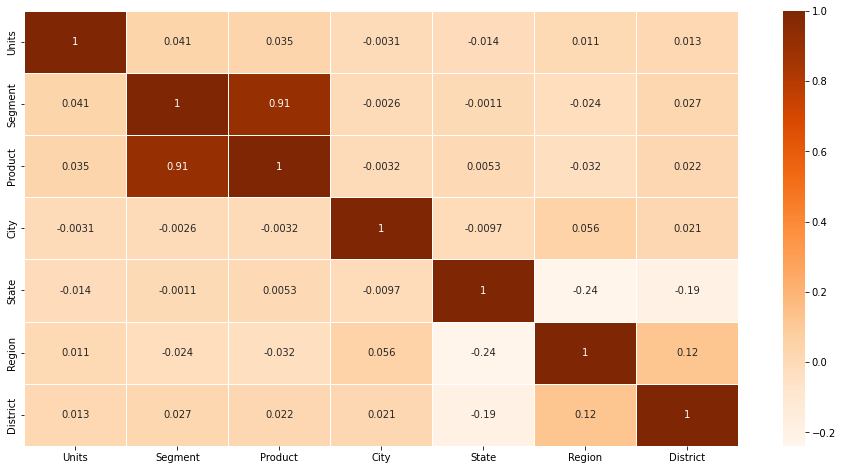

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(), annot = True, linewidths=.6, cmap = 'Oranges')

**Linear Regression**

Для дальнейшней работы с признаками посмотрим модель линейной регрессии, посмотрим что получится без нормализации признаков.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm =LinearRegression()
lm.fit(X_train, y_train)
y_pred=lm.predict(X_train)
print(f"The R2 train is: {round(r2_score(y_train, y_pred), 4)}")
count_metrics(lm)

The R2 train is: 0.5976
Results of LinearRegression()
The R2 value of LinearRegression() is 0.5955
MAE Error is 2088.407917
RMSE is 2936.933365
RAE is 0.830588
RSE is 0.404536
Cross validation train is [0.67953883 0.57882002 0.49187623 0.60091871 0.61953235 0.53694288
 0.62272397 0.62334928 0.60582077 0.55296459]
____________________________


**MinMax Scaler**



In [ ]:
# нормализация количественных признаков
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaled_minmax = minmax.fit_transform(X_train)
scaled_minmax_X_train = pd.DataFrame(scaled_minmax, columns = X_train.columns)
scaled_minmax_X_test = pd.DataFrame(scaled_minmax, columns = X_test.columns)
scaled_minmax_X_train.head()

,Units,Segment,Product,City,State,Region,District
0,0.0,0.0,0.188406,0.467591,0.937500,1.0,0.868421
1,0.0,0.4,0.888889,0.358348,0.854167,0.0,0.552632
2,0.0,0.0,0.304348,0.155979,0.979167,0.5,0.368421
3,0.0,0.0,0.019324,0.562276,0.083333,1.0,0.894737
4,0.0,0.0,0.202899,0.748238,0.520833,0.5,0.184211


In [ ]:
lm.fit(scaled_minmax_X_train, y_train)
print(f"The R2 train of scaled_minmax training is {round(lm.score(scaled_minmax_X_train, y_train), 4)}")


The R2 train of scaled_minmax training is 0.5976


Выходит, что в данном случае стандартизация не влияет на качество модели.

**RFECV**
(recursive feature elimination with cross validation)

In [ ]:
models_train = [X_train, scaled_minmax_X_train]
models_test = [X_test, scaled_minmax_X_test]


In [ ]:
rfecv = RFECV(estimator=lm, step=1, cv=8)

Optimal features is: 5
Optimal features is: 5


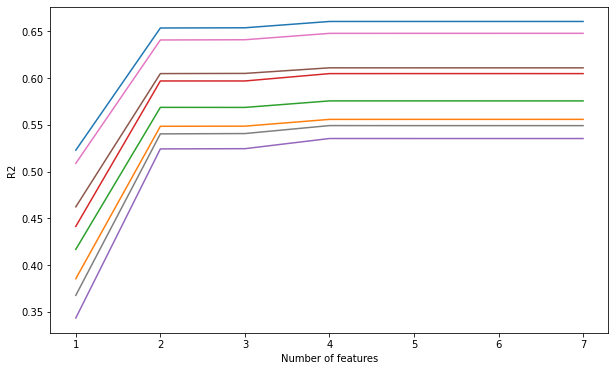

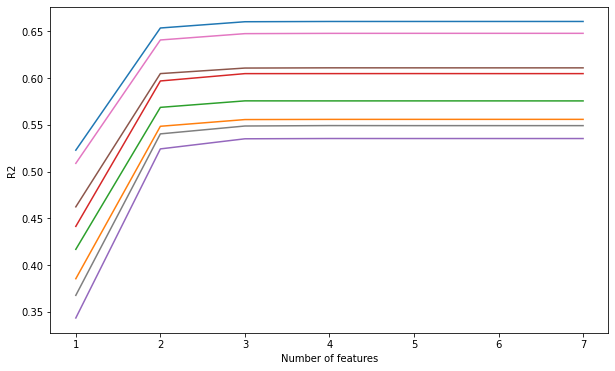

In [ ]:
for i in models_train:
  rfecv.fit(i, y_train)
  print(f"Optimal features is: {rfecv.n_features_}")
  # построим модели графически
  plt.figure(figsize=(10, 6))
  plt.xlabel("Number of features")
  plt.ylabel("R2")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

Посмотрим какие признаки нам предлагает оставить rfecv

In [ ]:
for i in models_train:
  rfecv.fit(i, y_train)
  rfecv.support_
  print(pd.DataFrame(rfecv.support_,index=X.columns,columns=['result']))

          result
Units       True
Segment     True
Product     True
City       False
State      False
Region      True
District    True
          result
Units       True
Segment     True
Product     True
City       False
State      False
Region      True
District    True


In [ ]:
#Нам предлагается убрать признаки: город и штат

linregmodel_2 = LinearRegression()

rfecv.fit(models_train[0], y_train)
rfecv.support_
X_train_new = models_train[0].loc[:, rfecv.support_]
linregmodel_2.fit(X_train_new, y_train)
X_test_new = models_test[0].loc[:,rfecv.support_]
predicted = linregmodel_2.predict(X_test_new)

print("Linear Regression: ")
print(f"The R2 value training is {round(linregmodel_2.score(X_train_new, y_train), 4)}")
print("______________________________________")
print(f"The R2 value testing is {round(linregmodel_2.score(X_test_new, y_test), 4)}")
print("______________________________________")

Linear Regression: 
The R2 value training is 0.5976
______________________________________
The R2 value testing is 0.5955
______________________________________


Показатели модели от этого не изменились. Но в более сложные модели я оставлю признаки как есть.

**Lasso, Ridge, ElasticNetCV**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn import linear_model

In [ ]:
linregmodel =LinearRegression()
ridgemodel = linear_model.Ridge(alpha=6, random_state=1234)
lasso = linear_model.Lasso(random_state=1234)
models = [linregmodel, ridgemodel, lasso]

In [ ]:
for i in models:
   count_metrics(i)

Results of LinearRegression()
The R2 value of LinearRegression() is 0.5955
MAE Error is 2088.407917
RMSE is 2936.933365
RAE is 0.830588
RSE is 0.404536
Cross validation train is [0.67953883 0.57882002 0.49187623 0.60091871 0.61953235 0.53694288
 0.62272397 0.62334928 0.60582077 0.55296459]
____________________________
Results of Ridge(alpha=6, random_state=1234)
The R2 value of Ridge(alpha=6, random_state=1234) is 0.5954
MAE Error is 2088.424485
RMSE is 2936.990254
RAE is 0.830594
RSE is 0.404552
Cross validation train is [0.67952305 0.57882021 0.4919295  0.60094693 0.61950627 0.53693359
 0.62268548 0.62335839 0.60581458 0.55298695]
____________________________
Results of Lasso(random_state=1234)
The R2 value of Lasso(random_state=1234) is 0.5954
MAE Error is 2088.405388
RMSE is 2937.111694
RAE is 0.830587
RSE is 0.404585
Cross validation train is [0.67949419 0.57881433 0.49203811 0.60099696 0.61945913 0.5368977
 0.62263123 0.62337125 0.60580144 0.5530203 ]
____________________________

Линейная регрессия справилась с результатом R2 - 59,55%

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forestregmodel = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=5)
count_metrics(forestregmodel)

Results of RandomForestRegressor(max_depth=5, n_estimators=25, random_state=42)
The R2 value of RandomForestRegressor(max_depth=5, n_estimators=25, random_state=42) is 0.6726
MAE Error is 1755.206224
RMSE is 2642.258098
RAE is 0.698069
RSE is 0.327431
Cross validation train is [0.75980222 0.69593022 0.63646543 0.71714643 0.73130272 0.66558265
 0.73658438 0.73336204 0.72071876 0.66575809]
____________________________


['0', '1']


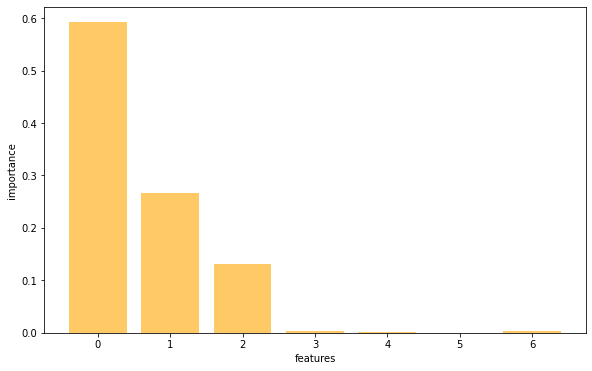

In [ ]:
# Выбор важных признаков
important_features = []
for x,i in enumerate(forestregmodel.feature_importances_):
    if i>np.average(forestregmodel.feature_importances_):
        important_features.append(str(x))
print (important_features)

plt.figure(figsize=(6 * 1.618, 6))
feature_import=forestregmodel.feature_importances_
index = np.arange(len(feature_import))
plt.bar(index, feature_import, color='orange', alpha=0.6)
plt.xlabel('features')
plt.ylabel('importance')
plt.xticks(index)
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236035 entries, 534909 to 799377
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Units     236035 non-null  int64 
 1   Segment   236035 non-null  object
 2   Product   236035 non-null  object
 3   City      236035 non-null  object
 4   State     236035 non-null  object
 5   Region    236035 non-null  object
 6   District  236035 non-null  object
dtypes: int64(1), object(6)
memory usage: 14.4+ MB


Самым важным признаком RF делает Сегмент, продукт и количество проданных единиц, а географическое расположение считает не важным. Результат RF - R2 67,26%

**SGD**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [ ]:
SGD = SGDRegressor(alpha=0.01, l1_ratio=0.2, random_state=1234, eta0=0.01, power_t=0.2, validation_fraction=0.05)

In [ ]:
# приведение данных к нормальному закону распределения:
#стандартизация признаков, вычитая среднее значение и масштабируя до единичной дисперсии z = (x-u)/s

from sklearn.preprocessing import StandardScaler
SGD_StandardScaler = make_pipeline(StandardScaler(), SGDRegressor(max_iter=20, tol=1e-3))

count_metrics(SGD_StandardScaler)

Results of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=20))])
The R2 value of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=20))]) is 0.5791
MAE Error is 2118.410781
RMSE is 2995.574003
RAE is 0.84252
RSE is 0.420852
Cross validation train is [0.67447626 0.57216338 0.46967249 0.59937585 0.61038146 0.53367915
 0.62911633 0.62323101 0.60508736 0.55478197]
____________________________


**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=50, random_state=1234, learning_rate= 0.3)
hist_gb_reg = HistGradientBoostingRegressor(max_iter=50, max_depth=8, random_state=1234)
count_metrics(gb_reg)
print("_____________________________________________")
count_metrics(hist_gb_reg)
print("_____________________________________________")


Results of GradientBoostingRegressor(learning_rate=0.3, n_estimators=50, random_state=1234)
The R2 value of GradientBoostingRegressor(learning_rate=0.3, n_estimators=50, random_state=1234) is 0.708
MAE Error is 1636.666993
RMSE is 2495.086421
RAE is 0.650924
RSE is 0.291971
Cross validation train is [0.90387562 0.87827362 0.85237179 0.88095128 0.88290336 0.84885006
 0.90187188 0.89639288 0.88129505 0.86195106]
____________________________
_____________________________________________
Results of HistGradientBoostingRegressor(max_depth=8, max_iter=50, random_state=1234)
The R2 value of HistGradientBoostingRegressor(max_depth=8, max_iter=50, random_state=1234) is 0.6275
MAE Error is 1879.875719
RMSE is 2818.314927
RAE is 0.747652
RSE is 0.372519
Cross validation train is [0.86008495 0.88674513 0.87152291 0.90816898 0.88839797 0.87809474
 0.85277468 0.81377357 0.90363557 0.83163146]
____________________________
_____________________________________________


['0', '2']


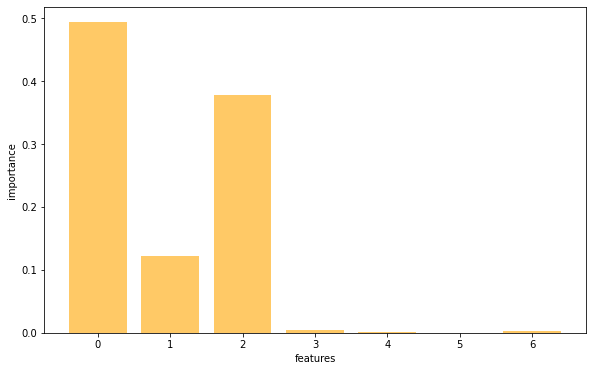

In [ ]:
important_features = []
for x,i in enumerate(gb_reg.feature_importances_):
    if i>np.average(gb_reg.feature_importances_):
        important_features.append(str(x))
print (important_features)

plt.figure(figsize=(6 * 1.618, 6))
feature_import=gb_reg.feature_importances_
index = np.arange(len(feature_import))
plt.bar(index, feature_import, color='orange', alpha=0.6)
plt.xlabel('features')
plt.ylabel('importance')
plt.xticks(index)
plt.show()



**Light GBM**

In [ ]:
!pip install lightgbm
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_test = lgb.Dataset(X_test,y_test, reference=lgb_train)

params = {'boosting_type': 'gbdt', 'objective': 'regression',
    'metric': {'l2', 'l1'}, 'num_leaves': 25, 'learning_rate': 0.05,
    'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'verbose': 0}

gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_test, early_stopping_rounds=5)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[1]	valid_0's l2: 1.98726e+07	valid_0's l1: 2418.05
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.85204e+07	valid_0's l1: 2328.81
[3]	valid_0's l2: 1.79456e+07	valid_0's l1: 2263.56
[4]	valid_0's l2: 1.73903e+07	valid_0's l1: 2208.73
[5]	valid_0's l2: 1.696e+07	valid_0's l1: 2170.55
[6]	valid_0's l2: 1.59357e+07	valid_0's l1: 2108.32
[7]	valid_0's l2: 1.49999e+07	valid_0's l1: 2054.58
[8]	valid_0's l2: 1.46646e+07	valid_0's l1: 2027.51
[9]	valid_0's l2: 1.38592e+07	valid_0's l1: 1979.34
[10]	valid_0's l2: 1.31605e+07	valid_0's l1: 1938.05
[11]	valid_0's l2: 1.25565e+07	valid_0's l1: 1910.25
[12]	valid_0's l2: 1.19538e+07	valid_0's l1: 1875.2
[13]	valid_0's l2: 1.13924e+07	valid_0's l1: 1843.64
[14]	valid_0's l2: 1.08916e+07	valid_0's l1: 1821.35
[15]	valid_0's l2: 1.04301e+07	valid_0's l1: 1797.38
[16]	valid_0's l2: 1.00458e+07	valid_0's l1: 1782.32
[17]	valid_0's l2: 9.65246e+06	valid_0's l1: 1757.06
[18]	valid_0's l2: 9.30617e+06	valid_0's l1: 1735.

In [ ]:
metrics(gbm)

Results of <lightgbm.basic.Booster object at 0x7f2089191dd0>
The R2 value of <lightgbm.basic.Booster object at 0x7f2089191dd0> is 0.6883
MAE is 1561.03227
RMSE is 2578.194002
RAE is 0.620843
RSE is 0.311745
____________________________


In [ ]:
# Для проверки не переобучилась ли модель
print(f"The R2 train value is: {round(r2_score(y_train,gbm.predict(X_train)), 4)}")

The R2 train value is: 0.7887


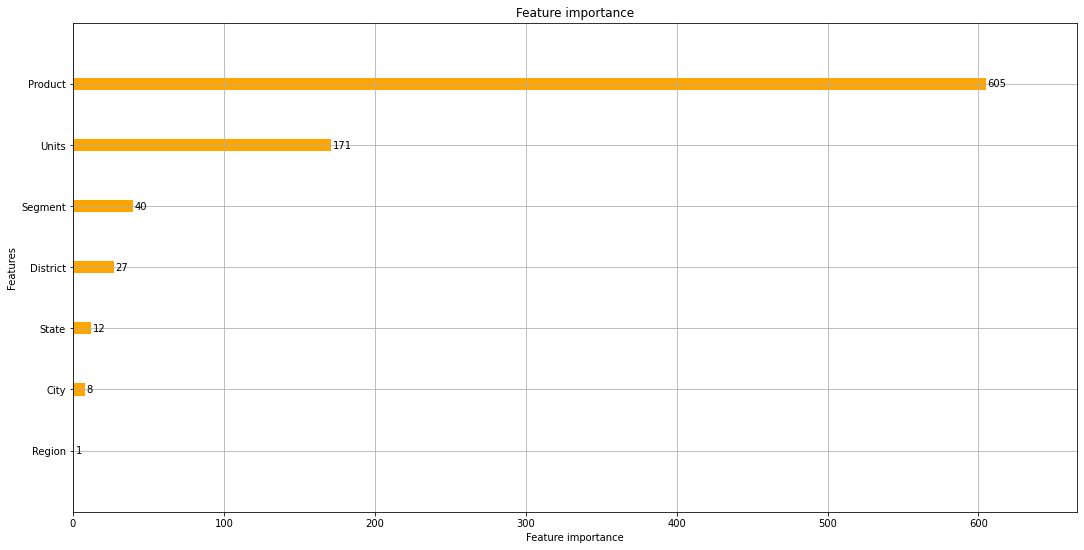

In [ ]:
lgb.plot_importance(gbm, color='orange')
plt.rcParams['figure.figsize'] = [12, 6]
plt.show()

Данная модель уже не считает количество проданных единиц главным признаком.

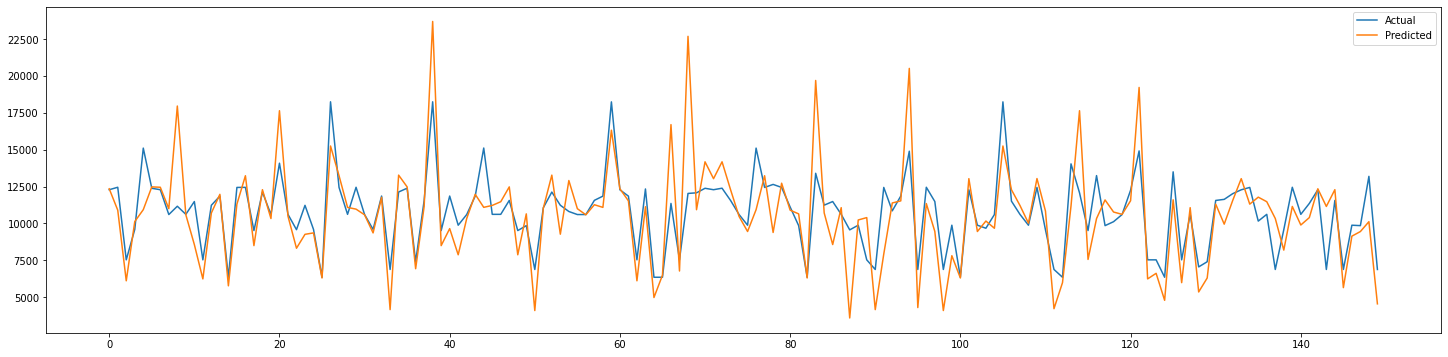

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,6))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual','Predicted'])

**XGBRegressor**

In [ ]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
xgbr = XGBRegressor(n_estimators=20, learning_rate=0.6, random_state=1234)
count_metrics(xgbr)

[08:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print(f"The R2 train value is: {round(r2_score(y_train,xgbr.predict(X_train)), 4)}")

The R2 train value is: 0.871


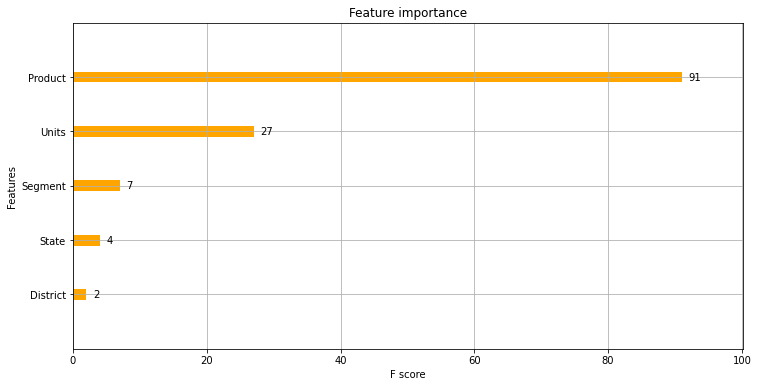

In [ ]:
xgb.plot_importance(xgbr, color='orange')
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

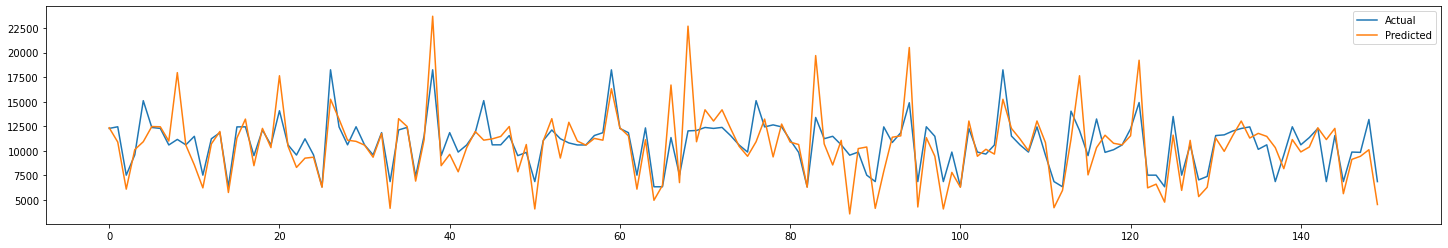

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual','Predicted'])

Данная модель получилась с лучшим результатом, чем предыдущие.

**XGBoost**

In [ ]:
xgboost = xgb.XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 20)

In [ ]:
xgboost.fit(X_train,y_train)

[08:11:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.9, learning_rate=0.5, max_depth=5,
             n_estimators=20)

In [ ]:
print(f"The R2 train value is: {round(r2_score(y_train,xgboost.predict(X_train)), 4)}")

The R2 train value is: 0.9201


In [ ]:
y_pred = xgboost.predict(X_test)

In [ ]:
metrics(xgboost)

Results of XGBRegressor(alpha=10, colsample_bytree=0.9, learning_rate=0.5, max_depth=5,
             n_estimators=20)
The R2 value of XGBRegressor(alpha=10, colsample_bytree=0.9, learning_rate=0.5, max_depth=5,
             n_estimators=20) is 0.6585
MAE is 1768.033355
RMSE is 2698.262757
RAE is 0.70317
RSE is 0.341458
____________________________


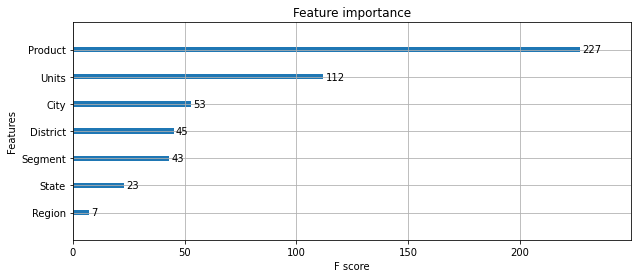

In [ ]:
xgb.plot_importance(xgboost)
plt.rcParams['figure.figsize'] = [5, 3]
plt.show()

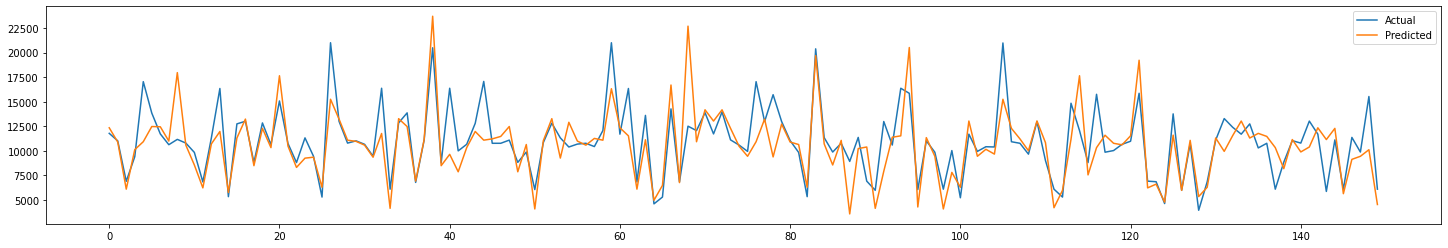

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual','Predicted'])

**Cat Boost**

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
catreg=CatBoostRegressor(iterations=100, depth=5, learning_rate=0.2, loss_function='MAE')
catreg.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2333.3523840	test: 2333.7209913	best: 2333.7209913 (0)	total: 82.6ms	remaining: 8.18s
1:	learn: 2190.1012720	test: 2193.2859600	best: 2193.2859600 (1)	total: 113ms	remaining: 5.56s
2:	learn: 2074.8877672	test: 2097.8179637	best: 2097.8179637 (2)	total: 140ms	remaining: 4.53s
3:	learn: 1979.3251084	test: 2019.2964527	best: 2019.2964527 (3)	total: 168ms	remaining: 4.03s
4:	learn: 1921.9864750	test: 1984.3195200	best: 1984.3195200 (4)	total: 197ms	remaining: 3.75s
5:	learn: 1866.6847126	test: 1937.6906902	best: 1937.6906902 (5)	total: 240ms	remaining: 3.75s
6:	learn: 1819.1624731	test: 1897.9121921	best: 1897.9121921 (6)	total: 280ms	remaining: 3.71s
7:	learn: 1787.4037924	test: 1872.2313251	best: 1872.2313251 (7)	total: 313ms	remaining: 3.6s
8:	learn: 1757.2002984	test: 1841.5860471	best: 1841.5860471 (8)	total: 343ms	remaining: 3.47s
9:	learn: 1743.1162379	test: 1841.0340781	best: 1841.0340781 (9)	total: 371ms	remaining: 3.34s
10:	learn: 1733.8209961	test: 1840.5859447	best: 1

In [ ]:
print(f"The R2 train value is {round(r2_score(y_train,catreg.predict(X_train)), 4)}")

The R2 train value is 0.5953


In [ ]:
y_pred = catreg.predict(X_test)
metrics(catreg)

Results of <catboost.core.CatBoostRegressor object at 0x7f208a25cfd0>
The R2 value of <catboost.core.CatBoostRegressor object at 0x7f208a25cfd0> is 0.5673
MAE is 1296.380213
RMSE is 3037.400799
RAE is 0.515588
RSE is 0.432686
____________________________


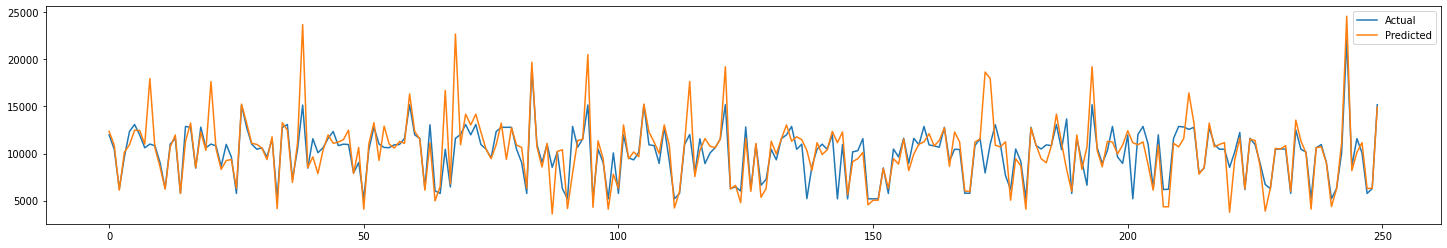

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:250])
plt.legend(['Actual','Predicted'])

**Лучшие показатели по R2**:

* в Scikit-learn RF: 67,260%
* в Scikit-learn GBRegressor: 70,8%
* LightGBM: 68,33%
* XGBregressor: 71,43%

Посмотрим результаты на других параметрах для лучшей модели

In [ ]:
# for i in range(10, 100, 20):
#   for j in range(3, 7, 2):
#     forestregmodel = RandomForestRegressor(n_estimators=i, random_state=42, max_depth=j)
#     forestregmodel.fit(X_train, y_train)
#     y_pred=forestregmodel.predict(X_test)
#     print(f"The R2 estimators={i}, depth={j} is: {round(r2_score(y_test, y_pred), 4)}")

In [ ]:
for i in range(8, 20, 3):
  xgbr = XGBRegressor(n_estimators=i, learning_rate=0.6, random_state=1234)
  xgbr.fit(X_train, y_train)
  y_pred=xgbr.predict(X_test)
  print(f"The R2 estimators={i} is: {round(r2_score(y_test, y_pred), 4)}")

[08:11:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 estimators=8 is: 0.7405
[08:12:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 estimators=11 is: 0.7227
[08:12:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 estimators=14 is: 0.7205
[08:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 estimators=17 is: 0.7192


Модель получилось улучшить до 74,05%. Посмотрим на новых данных.

In [ ]:
xgbr = XGBRegressor(n_estimators=8, learning_rate=0.6, random_state=1234)
xgbr.fit(X_train, y_train)
y_pred=xgbr.predict(X_val)
print(f"The R2 is: {round(r2_score(y_val, y_pred), 4)}")

[08:12:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 is: 0.7269


На новых данных результат модели 72,69%

# Time series

In [ ]:
# проверка на пропущенные даты
df_time.reindex(pd.date_range('2002-04-30', '2014-12-30')).isnull().all(1)

2002-04-30    True
2002-05-01    True
2002-05-02    True
2002-05-03    True
2002-05-04    True
              ... 
2014-12-26    True
2014-12-27    True
2014-12-28    True
2014-12-29    True
2014-12-30    True
Freq: D, Length: 4628, dtype: bool

In [ ]:
ts=df_time[['Date', 'Revenue']]
ts.head()

,Date,Revenue
3,2014-12-30,35010.36
9,2014-12-30,28348.74
13,2014-12-30,6708.87
28,2014-12-30,12851.37
29,2014-12-30,12851.37


In [ ]:
#ts.set_index('Date', inplace = True)
ts=ts.groupby(ts['Date']).sum()
#ts.index = pd.to_datetime(ts.index)
#ts['Sales_Date'] = ts.index

ts.head(2)

,Revenue
Date,
2002-04-30,1097362.35
2002-05-01,619992.45


In [ ]:
#округлим до целого числа
ts.Revenue=round(ts['Revenue'],0)
ts.Revenue=ts['Revenue'].astype('int64')
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4342 entries, 2002-04-30 to 2014-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  4342 non-null   int64
dtypes: int64(1)
memory usage: 67.8 KB


Построим график и посмотрим на данные и на скользящее среднее (rolling)

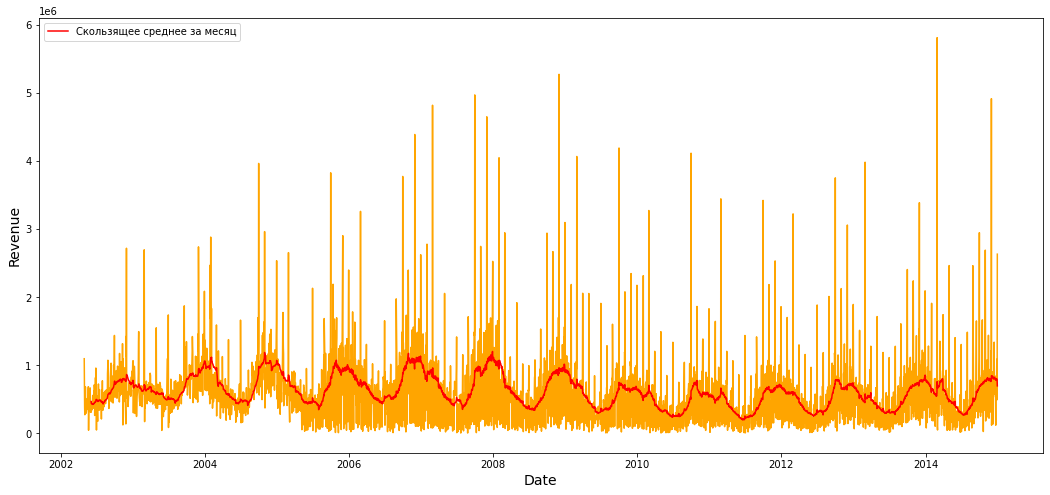

In [ ]:
plt.figure(figsize = (18, 8))

plt.plot(ts, color = 'orange')
plt.plot(ts.rolling(window = 30).mean(), label = 'Скользящее среднее за месяц', color = 'red')
plt.legend()
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
#plt.title

plt.show()


Мы видим, что продажи имеют выраженные пики.

Посмотрим за более короткий период, чтобы понять, что за пики.

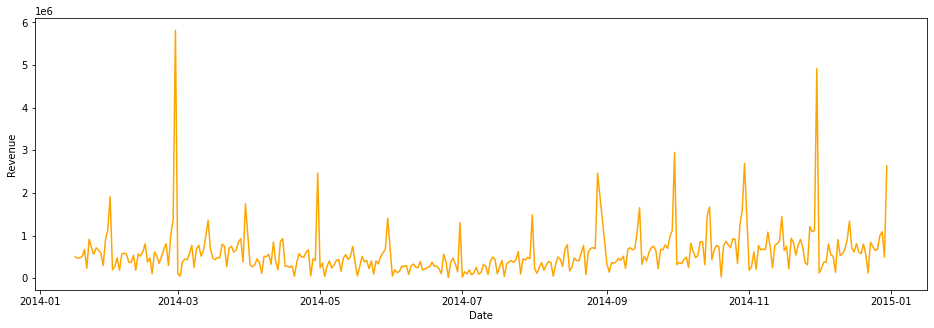

In [ ]:
ts_tmp = ts[4000:4343]
plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(ts_tmp.index,ts_tmp['Revenue'], color='orange')
plt.show()

Теперь видно, что пики на последнее число каждого месяца.

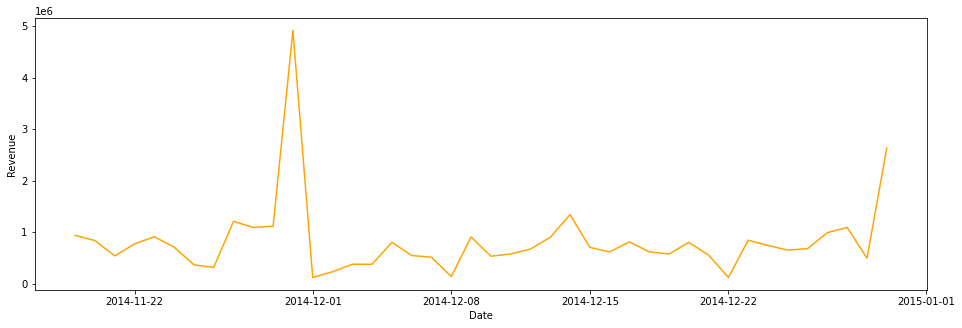

In [ ]:
#за еще более короткий период
ts_tmp = ts[4300:4343]
plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(ts_tmp.index,ts_tmp['Revenue'], color='orange')
plt.show()

In [ ]:
print(min(ts.index), max(ts.index))

2002-04-30 00:00:00 2014-12-30 00:00:00


In [ ]:
# Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

In [ ]:
ad_fuller_result = adfuller(ts['Revenue'])
print(f'ADF Statistic: {round(ad_fuller_result[0], 4)}')
print(f'p-value: {round(ad_fuller_result[1], 4)}')

ADF Statistic: -2.9507
p-value: 0.0398


In [ ]:
# разложим график помесячно, чтобы увидеть сезонность, тренды и тд
ts_tmp = ts.resample('M', label='right').sum()

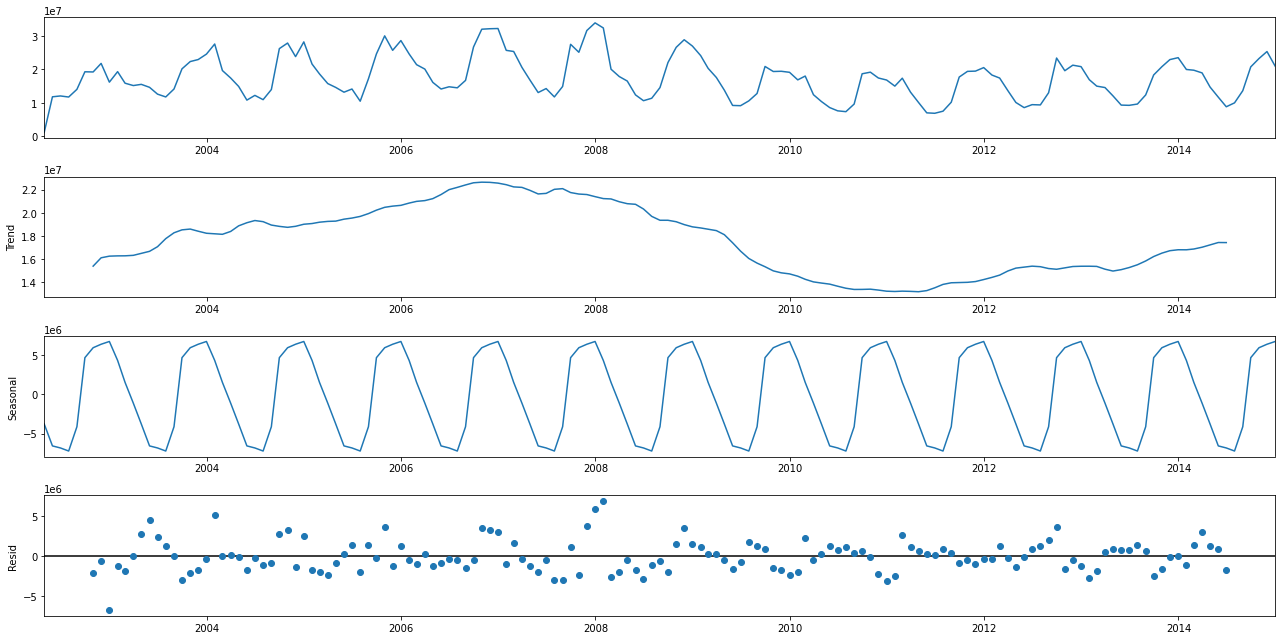

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 9
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_tmp)
decompose.plot()
plt.show()

In [ ]:
# для варианта прогноза на 3 года
# df_time = df_time.astype({'RunningMonths':int})
# df_time = df_time[df_time.RunningMonths <=36]

# ts_tmp=df_time[['Date', 'Revenue']]
# ts_tmp=ts_tmp.groupby(ts_tmp['Date']).sum()
# ts_tmp.index = pd.to_datetime(ts_tmp.index)
# ts_tmp.Revenue=round(ts_tmp['Revenue'],0)
# ts_tmp.Revenue=ts_tmp['Revenue'].astype('int64')
# ts_ml = ts_tmp[0:850]
# ts_pred = ts_tmp[850:1072]

In [ ]:
# делим на тест и трейд 20 на 80
ts_ml = ts[0:3472]
ts_pred = ts[3472:4341]

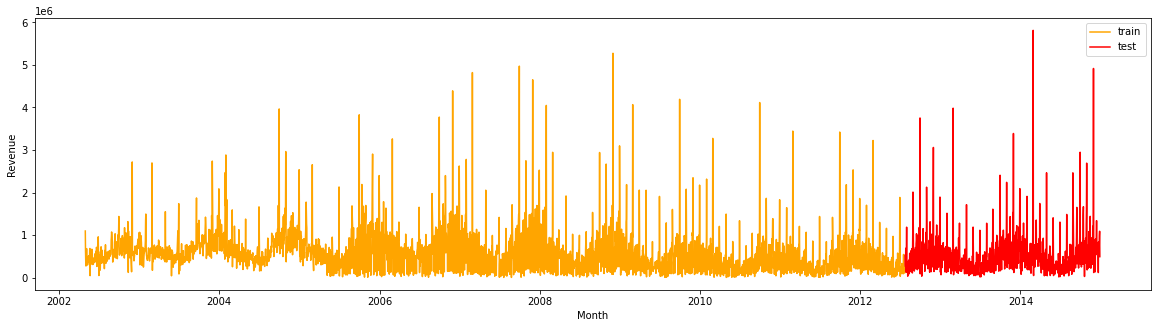

In [ ]:
# посмотрим на разделение множеств на тест и трейн
plt.figure(figsize=(20,5))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.plot(ts_ml.index,ts_ml['Revenue'],label='train', color='orange')
plt.plot(ts_pred.index,ts_pred['Revenue'],label='test', color='red')
plt.legend()
plt.show()

In [ ]:
# переведем данные обучающей выборки в месяца
ts_ml = ts_ml.resample('M', label='right').sum()
ts_pred = ts_pred.resample('M', label='right').sum()

In [ ]:
# подбор параментров для SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from pmdarima import auto_arima
parameter_search = auto_arima(ts_ml, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)

parameter_search.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3625.056, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3657.954, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3634.391, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3626.440, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3646.219, Time=0.17 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3624.040, Time=0.50 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3632.567, Time=0.32 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3626.040, Time=1.89 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3626.040, Time=2.13 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3624.429, Time=1.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3629.881, Time=0.86 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3627.977, Time=1.29 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3624.976, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3626.294, Time=0.33 sec
 ARIMA(2,1,1)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  124
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1805.544
Date:                                 Fri, 28 Oct 2022   AIC                           3623.088
Time:                                         08:04:11   BIC                           3639.345
Sample:                                     04-30-2002   HQIC                          3629.683
                                          - 07-31-2012                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.288e+04   1.75e+04     -1.875      0.061   -6.72e+04    1485.162
ar.L1          0.6556      0.130      5.032      0.000       0.400       0.911
ma.L1         -0.9079      0.096     -9.425      0.000      -1.097      -0.719
ma.S.L12      -0.5561      0.120     -4.624      0.000      -0.792      -0.320
ma.S.L24      -0.1929      0.098     -1.971      0.049      -0.385      -0.001
sigma2      8.801e+12   3.26e-05    2.7e+17      0.000     8.8e+12     8.8e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.28
Prob(Q):                              0.78   Prob(JB):                         0.19
Heteroskedasticity (H):               0.33   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+33. Standard errors may be unstable.
"""

In [ ]:
# но более высокий результат с другими гиперпараметрами
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts_ml, order = (0, 0, 3), seasonal_order = (1, 1, 2, 12))

In [ ]:
result = model.fit()
print(result.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 Revenue   No. Observations:                  124
Model:             SARIMAX(0, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1826.122
Date:                                 Fri, 28 Oct 2022   AIC                           3666.244
Time:                                         08:04:12   BIC                           3685.273
Sample:                                     04-30-2002   HQIC                          3673.965
                                          - 07-31-2012                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4960      0.099      5.005      0.000       0.302       0

In [ ]:
start = len(ts_ml)
end = len(ts_ml) + len(ts_pred) - 1
predictions = result.predict(start, end)

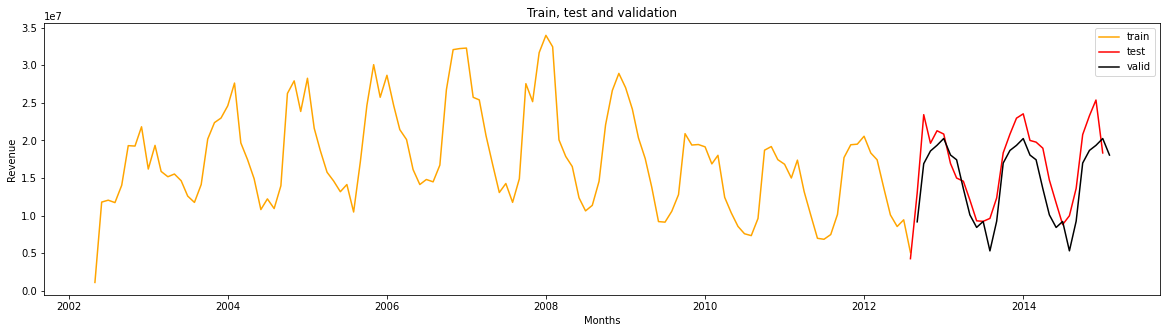

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(ts_ml.index,ts_ml['Revenue'],label='train', color='orange')
plt.plot(ts_pred.index,ts_pred['Revenue'],label='test', color='red')
plt.plot(predictions, label = 'valid', color = "black")

plt.title("Train, test and validation")
plt.ylabel('Revenue')
plt.xlabel('Months')

plt.legend()
plt.show()

In [ ]:
print(r2_score(ts_pred, predictions))

0.5192913857409163


In [ ]:
# построим прогноз на год
start = len(ts_tmp) -1
end = start +  12
forecast = result.predict(start, end)

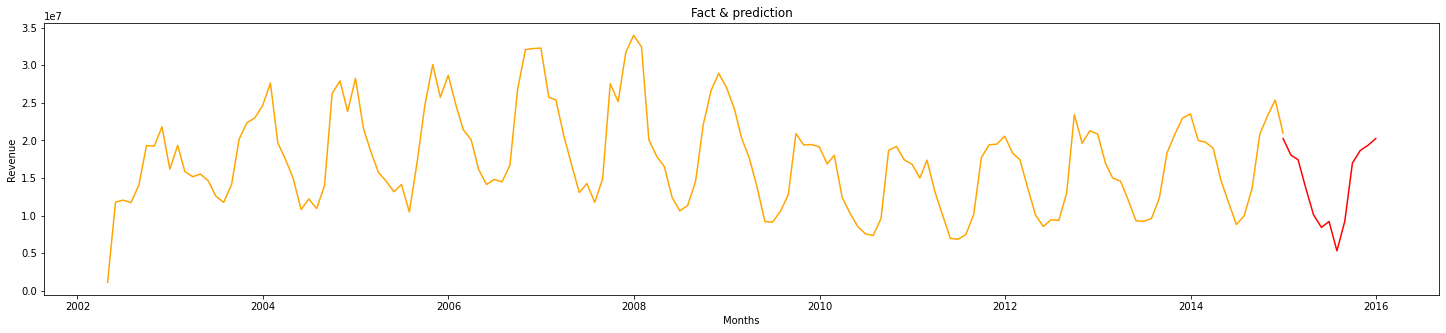

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(ts_tmp, color = 'orange')
plt.plot(forecast, color = 'red')
plt.title('Fact & prediction')
plt.ylabel('Revenue')
plt.xlabel('Months')
plt.show()

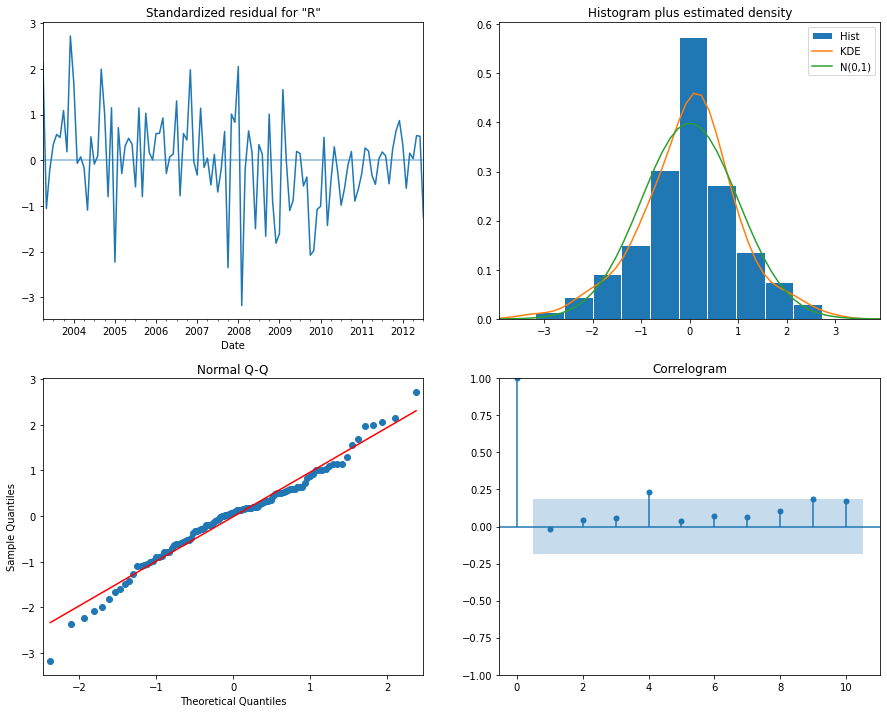

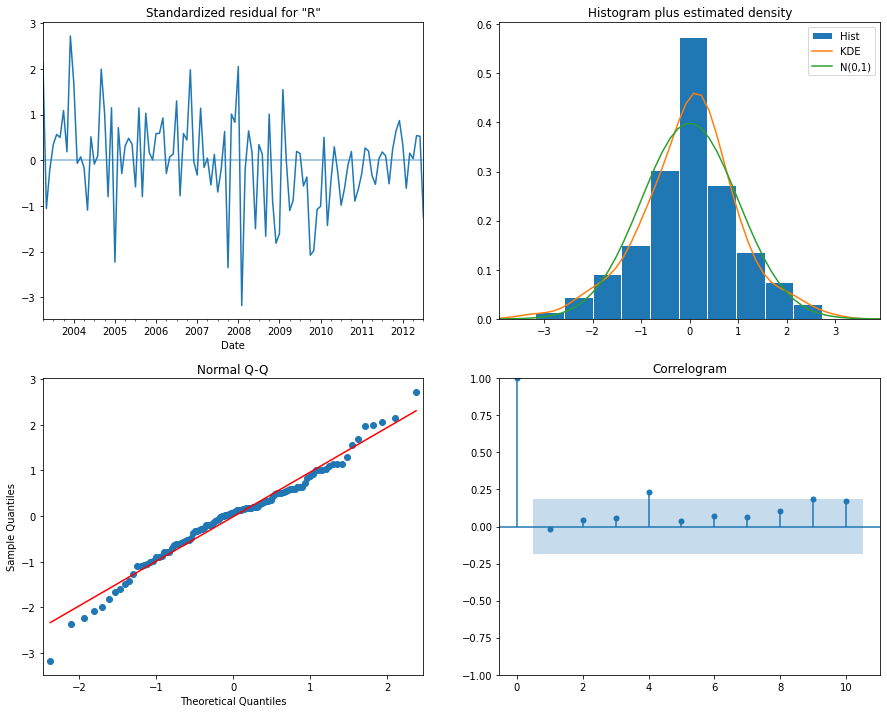

In [ ]:
#посмотрим, что скажут графики про нашу модель
result.plot_diagnostics(figsize=(15,12))

In [ ]:
!pip install greykite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results

In [ ]:
ts['Sales_Date'] = ts.index
ts.head()

,Revenue,Sales_Date
Date,,
2002-04-30,1097362,2002-04-30
2002-05-01,619992,2002-05-01
2002-05-02,386549,2002-05-02
2002-05-03,274822,2002-05-03
2002-05-05,492376,2002-05-05


In [ ]:
metadata = MetadataParam(time_col="Sales_Date", value_col="Revenue", freq='D')
forecaster = Forecaster()
result = forecaster.run_forecast_config(df=ts, config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=60, coverage=0.95, metadata_param=metadata))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
ts = result.timeseries
fig = ts.plot(color='orange')
plt.figure(figsize=(12,4))
plotly.io.show(fig)

<Figure size 864x288 with 0 Axes>

In [ ]:
# Сделаем бэктест
backtest = result.backtest
fig = backtest.plot()
plt.figure(figsize=(12,4))
plotly.io.show(fig)

<Figure size 864x288 with 0 Axes>

Посмотрим прогноз

In [ ]:
forecast = result.forecast
fig = forecast.plot()
plotly.io.show(fig)

In [ ]:
# Посмотрим тренды, сезонность
# fig = forecast.plot_components()
# plt.figure(figsize=(10,3))
# plotly.io.show(fig)

In [ ]:
ts_tmp['Sales_Date'] = ts_tmp.index

In [ ]:
metadata = MetadataParam(time_col="Sales_Date", value_col="Revenue", freq='M')
forecaster = Forecaster()
result = forecaster.run_forecast_config(df=ts_tmp, config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=12, coverage=0.95, metadata_param=metadata))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
forecast = result.forecast
fig = forecast.plot()
plotly.io.show(fig)

In [ ]:
prediction_period = 12
ts_train= ts_tmp[:len(ts_tmp)-prediction_period]
ts_test= ts_tmp[len(ts_tmp)-prediction_period:]

In [ ]:
from collections import defaultdict

In [ ]:
 backtest_eval = defaultdict(list)
 for metric, value in backtest.train_evaluation.items():
   backtest_eval[metric].append(value)
   backtest_eval[metric].append(backtest.test_evaluation[metric])
metrics = pd.DataFrame(backtest_eval, index=["ts_train", "ts_test"]).T
metrics

,ts_train,ts_test
CORR,0.579879,0.321616
R2,0.335789,0.095652
MSE,142288122625.134521,399049289002.637939
RMSE,377210.97893,631703.481867
MAE,228380.578621,336921.794204
MedAE,155405.337333,194365.308171
MAPE,104.049076,79.259649
MedAPE,27.716997,29.122774
sMAPE,20.993955,21.467245
Q80,113051.825049,151142.343423


Думаю, есть смысл провести такую аналитику по сегментам, регионам. Понять общая ли для всех производителей и сегментов тенденция продажи в конце месяца. Думаю, специалист данной сферы разобрался бы. А для меня это тема отдельного исследования.

# RFM & ABC & XYZ

In [ ]:
from datetime import date,timedelta

Данные виды анализа будем делать за последний год. 12 лет слишком большой
период для таких закономерностей.

In [ ]:
df_time = df_time.astype({'RunningMonths':int})
df_time = df_time[df_time.RunningMonths <=12]

In [ ]:
df_time.head(2)

,Date,Zip,Units,Revenue,Segment,Product,IsCompete,City,State,Region,District,RunningMonths,Price
3,2014-12-30,32901,3,35010.36,Moderation,Maximus UM-94,Yes,"Melbourne, FL",FL,East,District #10,1,11670.12
9,2014-12-30,21787,2,28348.74,Moderation,Maximus UM-70,Yes,"Taneytown, MD",MD,East,District #05,1,14174.37


In [ ]:
df_time.City.value_counts()

San Antonio, TX     100
Houston, TX          85
San Diego, CA        73
Albuquerque, NM      61
Denver, CO           60
                   ... 
Crystal City, TX      1
Scandia, KS           1
Uniondale, IN         1
Caledonia, MN         1
Millersville, PA      1
Name: City, Length: 6281, dtype: int64

In [ ]:
df_time.City.value_counts()[2714:2716]

Maple Shade, NJ    2
Toronto, KS        1
Name: City, dtype: int64

Анализ RFM по штатам, так как у нас нет покупателей, но интересно посмотреть, что выйдет из анализа по городам. А городов более половины с 1 продажей.

In [ ]:
last_date =  df_time['Date'].max() + timedelta(days=1)
rfm = df_time.reset_index().groupby('State').agg({'Date': lambda date: (last_date - date.max()).days,
                                                 'Units': lambda num: len(num),
                                                 'Revenue': lambda price: price.sum()})
rfm.rename(columns={'Date': 'recency',
                    'Units': 'frequency',
                    'Revenue': 'monetary_value'}, inplace=True)

In [ ]:
rfm.head(5)

,recency,frequency,monetary_value
State,,,
AK,3,33,417523.68
AL,1,189,2515628.43
AR,1,119,1571940.72
AZ,1,328,4041997.47
CA,1,1253,14897231.37


In [ ]:
quantiles = rfm.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = rfm

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]:
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['recency'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['frequency'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles))
segmented_rfm['monetary_value'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles))
segmented_rfm['RFMScore'] = segmented_rfm.recency.map(str) + segmented_rfm.frequency.map(str) + segmented_rfm.monetary_value.map(str)
segmented_rfm.tail(2)

,recency,frequency,monetary_value,RFMScore
State,,,,
WV,5,2,2,522
WY,5,1,1,511


In [ ]:
rfm = segmented_rfm
#rfm = segmented_rfm.drop(columns=['recency','frequency', 'monetary_value'])

In [ ]:
columns = rfm['recency'], rfm['frequency'], rfm['monetary_value']
for i in columns:
  print(i.value_counts())

1    40
5     9
Name: recency, dtype: int64
1    10
2    10
3    10
5    10
4     9
Name: frequency, dtype: int64
1    10
2    10
4    10
5    10
3     9
Name: monetary_value, dtype: int64


In [ ]:
segmented_rfm.groupby('State')['RFMScore'].sum().to_frame().sort_values(['RFMScore'], ascending=False)

,RFMScore
State,
WV,522
UT,522
SD,522
NV,522
AK,511
NH,511
VT,511
MT,511
WY,511


R=5, F=5, M=5 — покупают чаcто, много и недавно, это самые активные штаты.
R=1, F=1, M=1 — покупают мало, редко и давно. Их можно изучить и за весь период, возможно они ранее были хорошими клиентами.
R=1/2, F=4/5, M=4/5 - лояльные на грани ухода. Можно предлагать бесплатную доставку, акции на эти города и давать на них рекламу.
R=4/5, F=1, M=1/2/3/4/5 — пользователи недавно совершили покупку, в данном случае с городами нам эта информация ничего не дает.
Можно разделить покупателей по этим трем группам и посмотреть, какой именно товар они берут.

**XYZ - анализ товаров**

Посмотрим продажи по месяцам в денежном выражении

In [ ]:
xyz_pivot = df_time.pivot_table(['Revenue'], ['Product'], ['RunningMonths']).fillna(0)
months = xyz_pivot.columns
xyz_pivot['std'] = round(xyz_pivot[months].std(axis=1), 2)
xyz_pivot['total'] = xyz_pivot[months].sum(axis=1)
xyz_pivot['avg'] = xyz_pivot[months].mean(axis=1)
xyz_pivot['coef'] = round(xyz_pivot['std'] * 100 / xyz_pivot['avg'])
#xyz_pivot.sort_values(by='coef', ascending=True, inplace=True)


Text(0.5, 1.0, 'Coefficient of Variation')

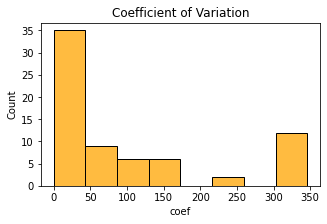

In [ ]:
sns.histplot(xyz_pivot['coef'], color='orange').set_title("Coefficient of Variation",fontsize=12)

Наблюдается большой разброс значений, что говорит о разном спросе на разные товары, вероятно этот спрос может быть сезонным, что и посмотрим далее

In [ ]:
xyz_pivot.coef.describe()

count     70.000000
mean     101.257143
std      125.010804
min        0.000000
25%        3.000000
50%       42.500000
75%      148.000000
max      346.000000
Name: coef, dtype: float64

In [ ]:
xyz_pivot.loc[(xyz_pivot.coef > 25), 'coef_xyz'] = 'Z'
xyz_pivot.loc[(xyz_pivot.coef == 25), 'coef_xyz'] = 'Z'
xyz_pivot.loc[(xyz_pivot.coef < 25), 'coef_xyz'] = 'Y'
xyz_pivot.loc[(xyz_pivot.coef < 10) , 'coef_xyz'] = 'X'
xyz_pivot.loc[(xyz_pivot.coef == 10), 'coef_xyz'] = 'Y'

xyz_pivot = xyz_pivot.drop(columns=['coef'])
xyz_pivot['xyz'] = xyz_pivot['coef_xyz']
xyz_pivot = xyz_pivot.drop(columns=['coef_xyz'])
xyz_pivot['xyz'].value_counts()

Z    45
X    25
Name: xyz, dtype: int64

In [ ]:
xyz_pivot.head(2)

Revenue                                                 \
RunningMonths            1             2            3         4         5   
Product                                                                     
Maximus UC-02     0.000000  10079.370000     0.000000  10079.37  10079.37   
Maximus UC-05  9900.062308  10325.864348  9875.097273   9822.87   9811.62   

                                                                              \
RunningMonths            6         7             8             9          10   
Product                                                                        
Maximus UC-02     0.000000  10079.37  10142.370000  10142.370000  10079.3700   
Maximus UC-05  9803.139231   9827.37   9816.252353   9831.075882   9807.6825   

                                           std          total          avg xyz  
RunningMonths            11        12                                           
Product                                                                         
Maximus UC-02  10079.370000  10100.37  4566.01   90861.330000  7571.777500   Z  
Maximus UC-05  10236.841364   9773.37   180.93  118831.245258  9902.603771   X

In [ ]:
xyz_table = xyz_pivot.groupby(['Product'])['xyz'].sum().to_frame().reset_index()

In [ ]:
# недоработанный способ
#xyz_table = df_time.reset_index().groupby('Product').agg({'Revenue': lambda var: round(np.std(var)*100/np.mean(var), 2)})

In [ ]:
xyz_table.head(2)

,Product,xyz
0,Maximus UC-02,Z
1,Maximus UC-05,X


In [ ]:
xyz_table['xyz'].value_counts()

Z    45
X    25
Name: xyz, dtype: int64

In [ ]:
xyz_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  70 non-null     object
 1   xyz      70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


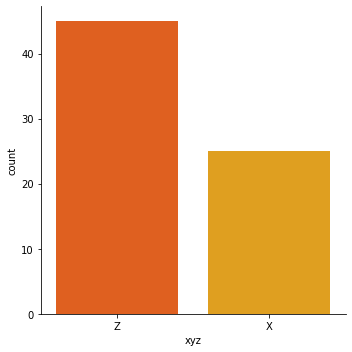

In [ ]:
sns.catplot(x ='xyz', kind = 'count', data = xyz_table, palette='autumn')

**ABC**

Построим Парето, чтобы посмотреть какие у нас значения

In [ ]:
#pip install abc-analysis
#from abc_analysis import abc_analysis

<AxesSubplot:xlabel='Revenue', ylabel='Density'>

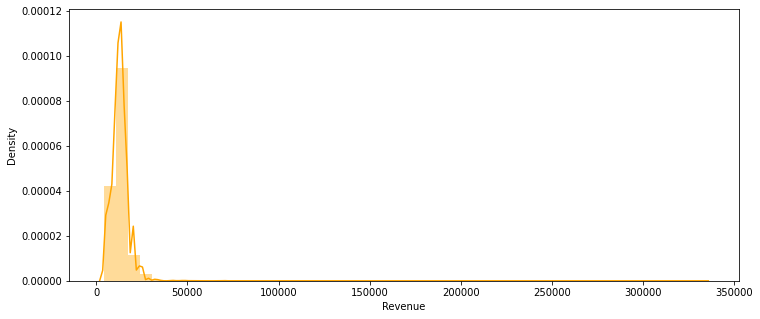

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df_time["Revenue"], color='orange')

In [ ]:
abc_pivot = df_time.pivot_table(values=['Revenue'], index=['Product'], aggfunc='sum')

In [ ]:
sum_sales = sum(abc_pivot['Revenue'])
sum_sales

207921987.387355

In [ ]:
abc_pivot['per']= abc_pivot['Revenue']/sum_sales

In [ ]:
#abc_pivot['per'].cumsum()
abc_pivot = abc_pivot.sort_values(['per'], ascending=False).cumsum()

In [ ]:
for index in abc_pivot.index:
  if abc_pivot.loc[index, 'per'] <= 0.8:
    abc_pivot.loc[index, 'coef_abc'] = 'A'
  elif  0.80 <= abc_pivot.loc[index, 'per'] < 0.95:
    abc_pivot.loc[index, 'coef_abc'] =  'B'
  else:
   abc_pivot.loc[index, 'coef_abc'] = 'C'
abc_pivot['coef_abc'].value_counts()


C    37
B    18
A    15
Name: coef_abc, dtype: int64

In [ ]:
abc_pivot.sort_values(['Product'], ascending=False)

,Revenue,per,coef_abc
Product,,,
Maximus UR-01,2.079220e+08,1.000000,C
Maximus UM-96,2.078800e+08,0.999798,C
Maximus UM-94,1.933544e+08,0.929937,B
Maximus UM-88,2.054418e+08,0.988071,C
Maximus UM-83,2.078292e+08,0.999554,C
Maximus UM-82,1.967002e+08,0.946029,B
Maximus UM-76,1.373320e+08,0.660498,A
Maximus UM-75,1.469259e+08,0.706640,A
Maximus UM-71,2.068858e+08,0.995016,C


In [ ]:
abc_table = abc_pivot.groupby(['Product'])['coef_abc'].sum().to_frame().reset_index()

In [ ]:
abc_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   70 non-null     object
 1   coef_abc  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# альтернативный способ по кластерам
# def bins(x):
#     for bar in range(2000, 340000, 2000):
#         if x <= bar:
#             return bar
# abc["Rev_dist"] = abc["Revenue"].apply(lambda x: bins(x))

# abc["Count"] = 1
# abc_pivot = pd.pivot_table(abc, index = ["Rev_dist"], values = ["Count"], aggfunc = np.sum)

# from sklearn.cluster import KMeans
# # сделаем кластеры
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(abc_pivot)

# abc_pivot["abc"] = kmeans.labels_
# ABC_dict = {
#     0: "A",
#     1: "B",
#     2: "C"
# }
# abc_pivot["abc"] = abc_pivot["abc"].apply(lambda x: ABC_dict[x])

In [ ]:
#abc = pd.merge(abc_pivot, abc, on = 'Product', how ='left', suffixes=('', '_y'))

In [ ]:
#abc = abc.drop(columns=['Revenue_y'])

In [ ]:
abc_table.shape

(70, 2)

In [ ]:
xyz_table.shape

(70, 2)

In [ ]:
abc_xyz = abc_table.join(xyz_table, lsuffix="DROP").filter(regex="^(?!.*DROP)")

In [ ]:
abc_xyz.head(2)

,coef_abc,Product,xyz
0,C,Maximus UC-02,Z
1,B,Maximus UC-05,X


In [ ]:
abc_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   coef_abc  70 non-null     object
 1   Product   70 non-null     object
 2   xyz       70 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [ ]:
abc_xyz['abc_xyz'] = abc_xyz['coef_abc'] + abc_xyz['xyz']

In [ ]:
abc_xyz.isna().sum()

coef_abc    0
Product     0
xyz         0
abc_xyz     0
dtype: int64

In [ ]:
abc_xyz['abc'] = abc_xyz['coef_abc']
abc_xyz = abc_xyz.drop(columns=['coef_abc'])

In [ ]:
abc_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  70 non-null     object
 1   xyz      70 non-null     object
 2   abc_xyz  70 non-null     object
 3   abc      70 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


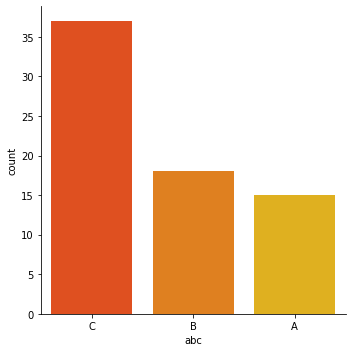

In [ ]:
sns.catplot(x ='abc', kind = 'count', data = abc_xyz, palette='autumn')

In [ ]:
df_query = pd.merge(df_time, rfm, on = "State", how ="left", suffixes=('', '_y'))

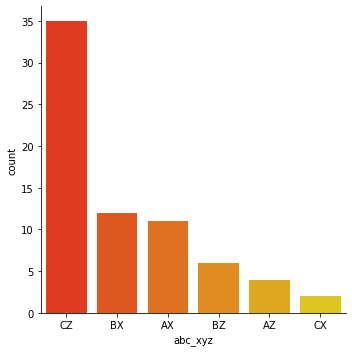

In [ ]:
sns.catplot(x ='abc_xyz', kind = 'count', data = abc_xyz, palette='autumn')

In [ ]:
#df_query = df_query.join(abc_xyz, lsuffix="DROP").filter(regex="^(?!.*DROP)")
df_query = pd.merge(df_query, abc_xyz, on = "Product", how ="left", suffixes=('', '_y'))
# теряет значения

In [ ]:
df_query.isna().sum()

Date              0
Zip               0
Units             0
Revenue           0
Segment           0
Product           0
IsCompete         0
City              0
State             0
Region            0
District          0
RunningMonths     0
Price             0
recency           0
frequency         0
monetary_value    0
RFMScore          0
xyz               0
abc_xyz           0
abc               0
dtype: int64

In [ ]:
df_query.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 0 to 15925
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            15926 non-null  datetime64[ns]
 1   Zip             15926 non-null  int64         
 2   Units           15926 non-null  int64         
 3   Revenue         15926 non-null  float64       
 4   Segment         15926 non-null  object        
 5   Product         15926 non-null  object        
 6   IsCompete       15926 non-null  object        
 7   City            15926 non-null  object        
 8   State           15926 non-null  object        
 9   Region          15926 non-null  object        
 10  District        15926 non-null  object        
 11  RunningMonths   15926 non-null  int64         
 12  Price           15926 non-null  float64       
 13  recency         15926 non-null  int64         
 14  frequency       15926 non-null  int64         
 15  mo

In [ ]:
# выгрузим файл для работы в Big Query
df_query.to_csv('/content/drive/MyDrive/Case_8/df_query.csv', index=False)

# Visialization

Отчеты в DataStudio были выгружены из BiqQuery

In [ ]:
%%html
<iframe width="900" height="800" src="https://datastudio.google.com/embed/reporting/022868ea-1fc1-4f86-b36a-a13b3a2ece49/page/tEnnC" frameborder="0" style="border:0" allowfullscreen></iframe>

In [ ]:
%%html
<iframe width="900" height="500" src="https://datastudio.google.com/embed/reporting/7f515e74-4a4b-4b1b-82fd-208a6766ae2e/page/tEnnC" frameborder="0" style="border:0" allowfullscreen></iframe>

In [ ]:
%%html
<iframe width="800" height="350" src="https://datastudio.google.com/embed/reporting/315208d5-cba0-4aca-86bb-eedaa8a422de/page/tEnnC" frameborder="0" style="border:0" allowfullscreen></iframe>

In [ ]:
# Продажи по всем штатам за весь период - перестал открываться, есть скрин в самой работе
%%html
<iframe width="700" height="750" src="https://datastudio.google.com/embed/reporting/82f4bba5-e9be-410c-8499-d9bbafae7a8d/page/tEnnC" frameborder="0" style="border:0" allowfullscreen></iframe>

# Resume

В данной работе:

1. Выбран датасет из предложенных кейсов
2. Проведен EDA
3. Проведена работа с признаками, категориальные переведены в числовые.
4. Подготовлены и обучены регресионные модели в ряде библиотек, в том числе сделаны временные ряды
5. Проведены анализы: rfm, abc,
6. Размещена визуализация из Data Studio